## Period finding circuit.


![shor alg circuit](./images/shor_alg_circuit1.png)

Implement 2 sub-circuits,

1. QFT.  Reimplement here while qiskit has already provided QFT 
2. Modular exponentiation $f_{a,N}(x) = a^x \mod N$

## Implement QFT

The quantum Fourier transform transforms between computational basis (Z) and the Fourier basis.

$$
\begin{align*}
|\text{State in Fourier Basis}\rangle &= \operatorname{QFT} |\text{State in Computational Basis}\rangle \\
|\tilde{x}\rangle &= \operatorname{QFT} |x\rangle 
\end{align*}
$$

Start with QFT definition, take Computational basis $|x\rangle = |x_{n-1} x_{n-2}\cdots x_1 x_0 \rangle$, 

$$
\begin{align*}
\operatorname{QFT}|x\rangle &= \frac{1}{\sqrt{2^n}} \sum_{y=0}^{2^n-1} e^{\frac{2\pi i}{2^n}xy} |y\rangle \; \text{ by definition} \\  
&= \frac{1}{\sqrt{2^n}} \sum_{y_{n-1}=0}^1 \sum_{y_{n-2}=0}^1 \cdots \sum_{y_1=0}^1 \sum_{y_0=0}^1 e^{\frac{2\pi i}{2^n}(\sum_{k=0}^{n-1}2^{k}y_k) x} |y_{n-1} y_{n-2} \cdots y_1 y_0 \rangle \\
&= \frac{1}{\sqrt{2^n}} \sum_{y_{n-1}=0}^1 \sum_{y_{n-2}=0}^1 \cdots \sum_{y_1=0}^1 \sum_{y_0=0}^1 e^{2\pi i(\sum_{k=0}^{n-1} \frac{y_k}{2^{n-k}}) x} |y_{n-1} y_{n-2} \cdots y_1 y_0 \rangle \\
&= \frac{1}{\sqrt{2^n}} \sum_{y_{n-1}=0}^1 \sum_{y_{n-2}=0}^1 \cdots \sum_{y_1=0}^1 \sum_{y_0=0}^1 \prod_{k=0}^{n-1} e^{2\pi i \frac{y_k}{2^{n-k}} x } |y_{n-1} y_{n-2} \cdots y_1 y_0 \rangle \\
&= \frac{1}{\sqrt{2^n}} \sum_{y_{n-1}=0}^1 \sum_{y_{n-2}=0}^1 \cdots \sum_{y_1=0}^1 \sum_{y_0=0}^1 
e^{2\pi i \frac{y_{n-1}}{2^1} x} |y_{n-1}\rangle \otimes
e^{2\pi i \frac{y_{n-2}}{2^2} x} |y_{n-2}\rangle \otimes
\cdots \otimes 
e^{2\pi i \frac{y_1}{2^{n-1}} x} |y_{1}\rangle \otimes
e^{2\pi i \frac{y_0}{2^{n}} x} |y_{0}\rangle \\
&= \frac{1}{\sqrt{2^n}} 
\sum_{y_{n-1}=0}^1 e^{2\pi i \frac{y_{n-1}}{2^1} x} |y_{n-1}\rangle \otimes
\sum_{y_{n-2}=0}^1 e^{2\pi i \frac{y_{n-2}}{2^2} x} |y_{n-2}\rangle \otimes
\cdots \otimes 
\sum_{y_1=0}^1 e^{2\pi i \frac{y_1}{2^{n-1}} x} |y_{1}\rangle \otimes
\sum_{y_0=0}^1 e^{2\pi i \frac{y_0}{2^{n}} x} |y_{0}\rangle \\
&= \frac{1}{\sqrt{2^n}} 
\left[ |0\rangle + e^{\frac{2\pi i}{2^1} x} |1\rangle \right] \otimes
\left[ |0\rangle + e^{\frac{2\pi i}{2^2} x} |1\rangle \right] \otimes
\cdots \otimes 
\left[ |0\rangle + e^{\frac{2\pi i}{2^{n-1}} x} |1\rangle \right] \otimes
\left[ |0\rangle + e^{\frac{2\pi i}{2^{n}} x} |1\rangle \right]                             \tag{1}
\end{align*}
$$

Now, consider the following circuit.

![n qubits qft](./images/n_qubits_qft1.png)

Some labeled states are derived below,

#### 1. H gate on most significant qubits $x_{n-1}$

$$
\begin{align*}
& H_{n-1}|x_{n-1}x_{n-2}x_{n-3}\cdots x_1x_0\rangle  \\

&= \frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2}x_{n-1}}|1\rangle\right] 
\otimes |x_{n-2}x_{n-3}\cdots x_1x_0\rangle 
\end{align*}
$$

#### 2. Apply controlled $\operatorname{UROT}_2$ on $x_{n-1}$

$$
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2}x_{n-1} + \frac{2\pi i}{2^2}x_{n-2}}|1\rangle\right] 
\otimes |x_{n-2}x_{n-3}\cdots x_1x_0\rangle 
$$

#### 5. Apply a series of controlled $\operatorname{UROT}_*$ gates on $x_{n-1}$

$$
\begin{align*}
& \frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2}x_{n-1} + \frac{2\pi i}{2^2}x_{n-2} + \frac{2\pi i}{2^3}x_{n-3} + \cdots + \frac{2\pi i}{2^{n-1}}x_1 + \frac{2\pi i}{2^n}x_0}|1\rangle\right] 
\otimes |x_{n-2}x_{n-3}\cdots x_1x_0\rangle     \\

&= \frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^n}(2^{n-1}x_{n-1} + 2^{n-2}x_{n-2} + 2^n-{3}x_{n-3} + \cdots + 2^1x_1 + 2^0x_0)}|1\rangle\right] 
\otimes |x_{n-2}x_{n-3}\cdots x_1x_0\rangle     \\

&= \frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^n}x}|1\rangle\right] 
\otimes |x_{n-2}x_{n-3}\cdots x_1x_0\rangle     \\
\end{align*}
$$

#### 6. Apply H gate on $x_{n-2}$

$$ 
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^n}x}|1\rangle\right]
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2}x_{n-2}}|1\rangle\right]
\otimes |x_{n-3}\cdots x_1x_0\rangle 
$$

#### 9. Apply a series of controlled $\operatorname{UROT}_*$ gates on $x_{n-2}$

The <span style="color:red">red</span> term does not change the value of the exponent while simplify the equation

$$
\begin{align*}
& \frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^n}x}|1\rangle\right]
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2}x_{n-2} + \frac{2\pi i}{2^2}x_{n-3} + \cdots + \frac{2\pi i}{2^{n-2}}x_1 + \frac{2\pi i}{2^{n-1}}x_0}|1\rangle\right]
\otimes |x_{n-3}\cdots x_1x_0\rangle        \\

&= \frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^n}x}|1\rangle\right]
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{
\frac{2\pi i}{2^{n-1}}(2^{n-2}x_{n-2} + 2^n-{3}x_{n-3} + \cdots + 2^1x_1 + 2^0x_0)
}|1\rangle\right]
\otimes |x_{n-3}\cdots x_1x_0\rangle        \\

&= \frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^n}x}|1\rangle\right]
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{
\frac{2\pi i}{2^{n-1}}({\color{red}{2^{n-1}x_{n-1}}} + 2^{n-2}x_{n-2} + 2^n-{3}x_{n-3} + \cdots + 2^1x_1 + 2^0x_0)
}|1\rangle\right]
\otimes |x_{n-3}\cdots x_1x_0\rangle        \\

&= \frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^n}x}|1\rangle\right]
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{
\frac{2\pi i}{2^{n-1}}x
}|1\rangle\right]
\otimes |x_{n-3}\cdots x_1x_0\rangle        \\
\end{align*}
$$

#### 12. Similarly for $x_{n-3}$

$$
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^n}x}|1\rangle\right]
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^{n-1}}x}|1\rangle\right]
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^{n-2}}x}|1\rangle\right]
\otimes |x_{n-4} \cdots x_1x_0\rangle 
$$

#### 15. Repeat until $x_{0}$

$$
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^n}x}|1\rangle\right]
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^{n-1}}x}|1\rangle\right]
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^{n-2}}x}|1\rangle\right]
\cdots
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^2}x}|1\rangle\right]
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^1}x}|1\rangle\right]
$$

#### 16. After all swap gates

$$
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^1}x}|1\rangle\right]
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^2}x}|1\rangle\right]
\cdots
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^{n-2}}x}|1\rangle\right]
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^{n-1}}x}|1\rangle\right]
\frac{1}{\sqrt{2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^n}x}|1\rangle\right]
$$

$$

\frac{1}{2^{n/2}}\left[ |0\rangle + e^{\frac{2\pi i}{2^1}x}|1\rangle\right]
\left[ |0\rangle + e^{\frac{2\pi i}{2^2}x}|1\rangle\right]
\cdots
\left[ |0\rangle + e^{\frac{2\pi i}{2^{n-2}}x}|1\rangle\right]
\left[ |0\rangle + e^{\frac{2\pi i}{2^{n-1}}x}|1\rangle\right]
\left[ |0\rangle + e^{\frac{2\pi i}{2^n}x}|1\rangle\right]                              \tag{2}

$$


Equation (1) derived from $\operatorname{QFT}$ definition is the same as equation (2) from quantum circuit.

### QFT circuit

Import qiskit and relevant packages.

In [1]:
import numpy as np
from numpy import pi
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit import QuantumRegister, ClassicalRegister

Circuit for 3-qubits QFT from qiskit library.

Qubit 0 turns 5x $45^\degree$ along z-axis; qubit 1 turns 5x $90^\degree$ along z-axis and qubit 2 turns 5x $180^\degree$.

┌────────────────────┐┌──────┐
q_0: ┤0                   ├┤0     ├
     │                    ││      │
q_1: ┤1 Initialize(1,0,1) ├┤1 QFT ├
     │                    ││      │
q_2: ┤2                   ├┤2     ├
     └────────────────────┘└──────┘

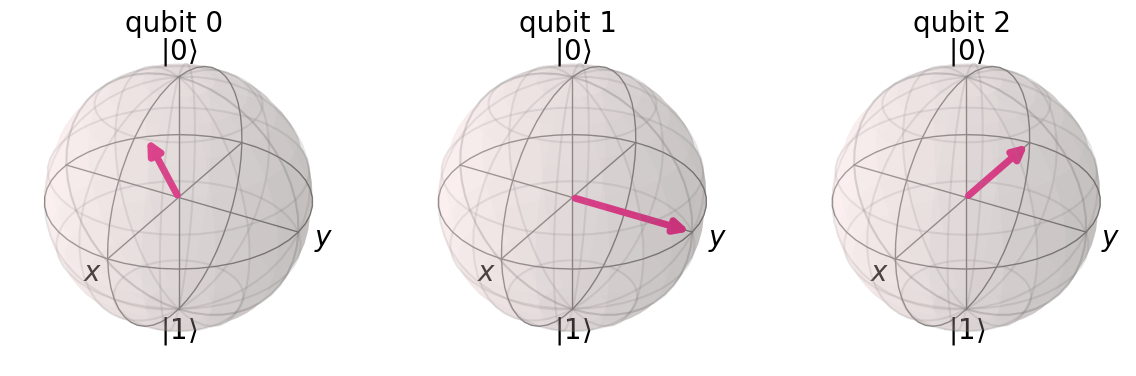

In [2]:
from qiskit.circuit.library import QFT

sim = Aer.get_backend('statevector_simulator')
init_state = '101'
qc1 = QuantumCircuit(3)
qc1.initialize(init_state)
qc1.append(QFT(num_qubits=3), [0, 1, 2])
display(qc1.draw())
sv1 = sim.run(transpile(qc1, sim)).result().get_statevector()
plot_bloch_multivector(sv1)


Implement 3-qubits QFT with H and controlled-$\operatorname{UROT}_*$ (or control-phase) gates according to the circuit above.

┌────────────────────┐ ░                                      ┌───┐   
q_0: ┤0                   ├─░────────────────■─────────────■───────┤ H ├─X─
     │                    │ ░                │       ┌───┐ │P(π/2) └───┘ │ 
q_1: ┤1 Initialize(1,0,1) ├─░───────■────────┼───────┤ H ├─■─────────────┼─
     │                    │ ░ ┌───┐ │P(π/2)  │P(π/4) └───┘               │ 
q_2: ┤2                   ├─░─┤ H ├─■────────■───────────────────────────X─
     └────────────────────┘ ░ └───┘

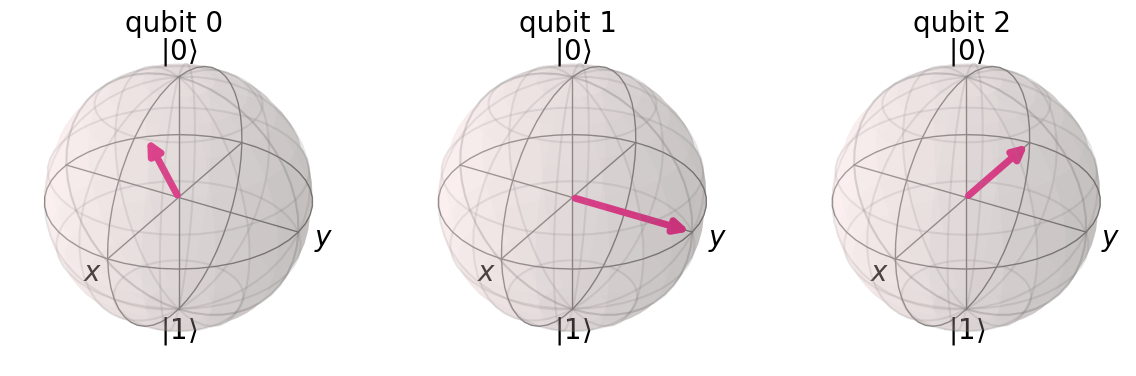

In [3]:
sim = Aer.get_backend('statevector_simulator')
init_state = '101'

qc2 = QuantumCircuit(3)
qc2.initialize(init_state)
qc2.barrier()

qc2.h(2)
qc2.cp(pi/2, 1, 2)
qc2.cp(pi/4, 0, 2)

qc2.h(1)
qc2.cp(pi/2, 0, 1)

qc2.h(0)

qc2.swap(0, 2)

display(qc2.draw())

sv2 = sim.run(qc2).result().get_statevector()
plot_bloch_multivector(sv2)

### Implement the general QFT gate

In [4]:
# implement general QFT

def create_qft(n, draw=False):
    qc = QuantumCircuit(n)
    for i in reversed(range(n)):
        qc.h(i)
        for e, j in enumerate(reversed(range(i))):
            qc.cp(pi/2**(e+1), j, i)
    for i in range(n//2):
        qc.swap(i, n-i-1)
    if draw:
        display(qc.draw())
    return qc.to_gate(label='myqft{}'.format(n))

Test create_qft()

┌───┐   
q_0: ───────────────■─────────────■───────┤ H ├─X─
                    │       ┌───┐ │P(π/2) └───┘ │ 
q_1: ──────■────────┼───────┤ H ├─■─────────────┼─
     ┌───┐ │P(π/2)  │P(π/4) └───┘               │ 
q_2: ┤ H ├─■────────■───────────────────────────X─
     └───┘

┌────────────────────┐┌─────────┐
q_0: ┤0                   ├┤0        ├
     │                    ││         │
q_1: ┤1 Initialize(1,0,1) ├┤1 myqft3 ├
     │                    ││         │
q_2: ┤2                   ├┤2        ├
     └────────────────────┘└─────────┘

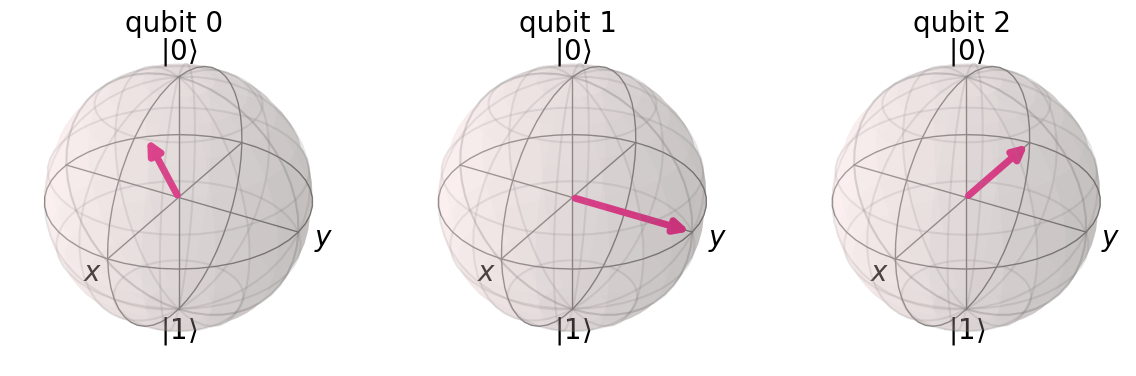

In [5]:
sim = Aer.get_backend('statevector_simulator')
init_state = '101'

qc3 = QuantumCircuit(3)
qc3.initialize(init_state)
qc3.append(create_qft(3, True), [0, 1, 2])
display(qc3.draw())
sv3 = sim.run(transpile(qc3, sim)).result().get_statevector()
plot_bloch_multivector(sv3)

## Implement Modular exponentiation
### $f_{a,N}(x) = a^x \mod N$

The Exponentiation Modulo N circuit was implemented according to [Vlatko Vedral, Adriano Barenco and Artur Ekert, Quantum Networks for Elementary Arithmetic Operations](https://arxiv.org/abs/quant-ph/9511018)

Also highly suggest to cross reference the quantum circuits in [stackexchange, Is there a simple, formulaic way to construct a modular exponentiation circuit?](https://quantumcomputing.stackexchange.com/questions/6842/is-there-a-simple-formulaic-way-to-construct-a-modular-exponentiation-circuit) where 2 quantum circuit diagrams were borrowed and shown below.


### Carrier

From [Vlatko Vedral et al.](https://arxiv.org/abs/quant-ph/9511018), the carrier circuit does

$$
\begin{align*}
c_0 &= c_0                      \\
a_0 &= a_0                      \\
b_0 &= a_0 \oplus b_0           \\
c_1 &= 1 \; \text{if at least 2 of} \; c_0, a_0, b_0 \; \text{is 1}      \\
\end{align*}
$$

Carrier operator leaves $b_0$ to store $b_0 \oplus a_0$ temporary which will be restored in carrier inverse (when implements the adder).

In [6]:
def create_carrier_orig(name=None, draw=False):
    c0 = QuantumRegister(1, 'c0')
    a0 = QuantumRegister(1, 'a0')
    b0 = QuantumRegister(1, 'b0')
    c1 = QuantumRegister(1, 'c1')
    qc = QuantumCircuit(c0, a0, b0, c1)
    qc.toffoli(1, 2, 3)
    qc.cx(1, 2)
    qc.toffoli(0, 2, 3)
    if draw:
        display(qc.draw())
    return qc.to_gate(label=name or 'carrier_orig')

def create_carrier_orig_inv(name=None):
    qc = QuantumCircuit(4)
    qc.append(create_carrier_orig().inverse(), range(4))
    return qc.to_gate(label=name or 'carrier_orig_inv')

In [7]:
create_carrier_orig('carrier', True)

c0: ────────────■──
                │  
a0: ──■────■────┼──
      │  ┌─┴─┐  │  
b0: ──■──┤ X ├──■──
    ┌─┴─┐└───┘┌─┴─┐
c1: ┤ X ├─────┤ X ├
    └───┘     └───┘

Instruction(name='circuit-163', num_qubits=4, num_clbits=0, params=[])

In this note, the carrier does

$$
\begin{align*}
c_0 &= c_0                      \\
a_0 &= a_0                      \\
b_0 &= b_0                      \\
c_1 &= 1 \; \text{if at least 2 of} \; c_0, a_0, b_0 \; \text{is 1}      \\
\end{align*}
$$

Only $c_1$ is calculated and leave $a_0$ and $b_0$ unchange.  

In [8]:
def create_carrier(name=None, draw=False):
    c0 = QuantumRegister(1, 'c0')
    a0 = QuantumRegister(1, 'a0')
    b0 = QuantumRegister(1, 'b0')
    c1 = QuantumRegister(1, 'c1')
    qc = QuantumCircuit(c0, a0, b0, c1)
    qc.toffoli(1, 2, 3)
    qc.cx(1, 2)
    qc.toffoli(0, 2, 3)
    qc.cx(1, 2)
    if draw:
        display(qc.draw())
    return qc.to_gate(label=name or 'carrier')

def create_carrier_inv(name=None):
    qc = QuantumCircuit(4)
    qc.append(create_carrier().inverse(), range(4))
    return qc.to_gate(label=name or 'carrier_inv')

In [9]:
create_carrier('carrier', True)

c0: ────────────■───────
                │       
a0: ──■────■────┼────■──
      │  ┌─┴─┐  │  ┌─┴─┐
b0: ──■──┤ X ├──■──┤ X ├
    ┌─┴─┐└───┘┌─┴─┐└───┘
c1: ┤ X ├─────┤ X ├─────
    └───┘     └───┘

Instruction(name='circuit-166', num_qubits=4, num_clbits=0, params=[])

### Sum

Update $b_n$ according to the value of $a_n$ and $c_n$.

In [10]:
def create_sum(name=None, draw=False):
    c0 = QuantumRegister(1, 'c0')
    a0 = QuantumRegister(1, 'a0')
    b0 = QuantumRegister(1, 'b0')
    qc = QuantumCircuit(c0, a0, b0)
    qc.cx(a0, b0)
    qc.cx(c0, b0)
    if draw:
        display(qc.draw())
    return qc.to_gate(label=name or 'sum')

def create_sum_inv(name=None):
    qc = QuantumCircuit(3)
    qc.append(create_sum().inverse(), range(3))
    return qc.to_gate(label=name or 'sum_inv')

In [11]:
create_sum('sum', True)

c0: ───────■──
           │  
a0: ──■────┼──
    ┌─┴─┐┌─┴─┐
b0: ┤ X ├┤ X ├
    └───┘└───┘

Instruction(name='circuit-169', num_qubits=3, num_clbits=0, params=[])

Use create_carrier_orig() to implement 3-qubits adder.  There is a controlled-Not gate before first sum operator.  It is to restore the $b_2$ and then let sum operator to update $b_2$.  Use create_carrier_orig_inv() to undo the change to $(c_2, b_1)$ and $(c_1, b_0)$.  $c_0$ is always zero and is used to feed to dummy input to the first create_carrier_orig().

In [12]:
a = QuantumRegister(3, 'a')
b = QuantumRegister(4, 'b')
c = QuantumRegister(3, 'c')
creg = ClassicalRegister(4, 'creg')
qc = QuantumCircuit(a, b, c, creg)
qc.x(a[0])  # a = 101(2)
qc.x(a[2])
qc.x(b[1])  # b = 110(2)
qc.x(b[2])
qc.append(create_carrier_orig(), [c[0], a[0], b[0], c[1]])
qc.append(create_carrier_orig(), [c[1], a[1], b[1], c[2]])
qc.append(create_carrier_orig(), [c[2], a[2], b[2], b[3]])
qc.cx(a[2], b[2])
qc.append(create_sum(), [c[2], a[2], b[2]])
qc.append(create_carrier_orig_inv(), [c[1], a[1], b[1], c[2]])
qc.append(create_sum(), [c[1], a[1], b[1]])
qc.append(create_carrier_orig_inv(), [c[0], a[0], b[0], c[1]])
qc.append(create_sum(), [c[0], a[0], b[0]])
qc.barrier()
qc.measure(b, creg)
display(qc.draw())
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend), shots=1024)
counts = job.result().get_counts()
print(counts)

┌───┐┌───────────────┐                                               »
   a_0: ┤ X ├┤1              ├───────────────────────────────────────────────»
        └───┘│               │┌───────────────┐                              »
   a_1: ─────┤               ├┤1              ├──────────────────────────────»
        ┌───┐│               ││               │┌───────────────┐     ┌──────┐»
   a_2: ┤ X ├┤               ├┤               ├┤1              ├──■──┤1     ├»
        └───┘│               ││               ││               │  │  │      │»
   b_0: ─────┤2              ├┤               ├┤               ├──┼──┤      ├»
        ┌───┐│               ││               ││               │  │  │      │»
   b_1: ┤ X ├┤  carrier_orig ├┤2              ├┤               ├──┼──┤      ├»
        ├───┤│               ││               ││               │┌─┴─┐│      │»
   b_2: ┤ X ├┤               ├┤  carrier_orig ├┤2              ├┤ X ├┤2     ├»
        └───┘│               ││               ││  carrier_orig │└───┘│  sum │»
   b_3: ─────┤               ├┤               ├┤3              ├─────┤      ├»
             │               ││               ││               │     │      │»
   c_0: ─────┤0              ├┤               ├┤               ├─────┤      ├»
             │               ││               ││               │     │      │»
   c_1: ─────┤3              ├┤0              ├┤               ├─────┤      ├»
             └───────────────┘│               ││               │     │      │»
   c_2: ──────────────────────┤3              ├┤0              ├─────┤0     ├»
                              └───────────────┘└───────────────┘     └──────┘»
creg: 4/═════════════════════════════════════════════════════════════════════»
                                                                             »
«                                     ┌───────────────────┐┌──────┐ ░          »
«   a_0: ─────────────────────────────┤1                  ├┤1     ├─░──────────»
«        ┌───────────────────┐┌──────┐│                   ││      │ ░          »
«   a_1: ┤1                  ├┤1     ├┤                   ├┤      ├─░──────────»
«        │                   ││      ││                   ││      │ ░          »
«   a_2: ┤                   ├┤      ├┤                   ├┤      ├─░──────────»
«        │                   ││      ││                   ││      │ ░ ┌─┐      »
«   b_0: ┤                   ├┤      ├┤2                  ├┤2     ├─░─┤M├──────»
«        │                   ││      ││                   ││  sum │ ░ └╥┘┌─┐   »
«   b_1: ┤2                  ├┤2     ├┤  carrier_orig_inv ├┤      ├─░──╫─┤M├───»
«        │                   ││  sum ││                   ││      │ ░  ║ └╥┘┌─┐»
«   b_2: ┤  carrier_orig_inv ├┤      ├┤                   ├┤      ├─░──╫──╫─┤M├»
«        │                   ││      ││                   ││      │ ░  ║  ║ └╥┘»
«   b_3: ┤                   ├┤      ├┤                   ├┤      ├─░──╫──╫──╫─»
«        │                   ││      ││                   ││      │ ░  ║  ║  ║ »
«   c_0: ┤                   ├┤      ├┤0                  ├┤0     ├─░──╫──╫──╫─»
«        │                   ││      ││                   │└──────┘ ░  ║  ║  ║ »
«   c_1: ┤0                  ├┤0     ├┤3                  ├─────────░──╫──╫──╫─»
«        │                   │└──────┘└───────────────────┘         ░  ║  ║  ║ »
«   c_2: ┤3                  ├──────────────────────────────────────░──╫──╫──╫─»
«        └───────────────────┘                                      ░  ║  ║  ║ »
«creg: 4/══════════════════════════════════════════════════════════════╩══╩══╩═»
«                                                                      0  1  2 »
«           
«   a_0: ───
«           
«   a_1: ───
«           
«   a_2: ───
«           
«   b_0: ───
«           
«   b_1: ───
«           
«   b_2: ───
«        ┌─┐
«   b_3: ┤M├
«        └╥┘
«   c_0: ─╫─
«         ║ 
«   c_1: ─╫─
«         ║ 
«   c_2: ─╫─
«         ║ 
«creg: 4/═╩═
«         3

{'1011': 1024}


Use create_carrier() to implement 3-qubits adder.  It does not need controlled-Not gate before first sum operator.  Use create_carrier_orig_inv() to undo the change to $c_2$ and $c_1$.

In [13]:
a = QuantumRegister(3, 'a')
b = QuantumRegister(4, 'b')
c = QuantumRegister(3, 'c')
creg = ClassicalRegister(4, 'creg')
qc = QuantumCircuit(a, b, c, creg)
qc.x(a[0])  # a = 101(2)
qc.x(a[2])
qc.x(b[1])  # b = 110(2)
qc.x(b[2])
qc.append(create_carrier(), [c[0], a[0], b[0], c[1]])
qc.append(create_carrier(), [c[1], a[1], b[1], c[2]])
qc.append(create_carrier(), [c[2], a[2], b[2], b[3]])
# qc.cx(a[2], b[2])     # this was put into create_carrier()
qc.append(create_sum(), [c[2], a[2], b[2]])
qc.append(create_carrier_inv(), [c[1], a[1], b[1], c[2]])
qc.append(create_sum(), [c[1], a[1], b[1]])
qc.append(create_carrier_inv(), [c[0], a[0], b[0], c[1]])
qc.append(create_sum(), [c[0], a[0], b[0]])
qc.barrier()
qc.measure(b, creg)
display(qc.draw())
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend), shots=1024)
counts = job.result().get_counts()
print(counts)

┌───┐┌──────────┐                                                »
   a_0: ┤ X ├┤1         ├────────────────────────────────────────────────»
        └───┘│          │┌──────────┐                    ┌──────────────┐»
   a_1: ─────┤          ├┤1         ├────────────────────┤1             ├»
        ┌───┐│          ││          │┌──────────┐┌──────┐│              │»
   a_2: ┤ X ├┤          ├┤          ├┤1         ├┤1     ├┤              ├»
        └───┘│          ││          ││          ││      ││              │»
   b_0: ─────┤2         ├┤          ├┤          ├┤      ├┤              ├»
        ┌───┐│          ││          ││          ││      ││              │»
   b_1: ┤ X ├┤  carrier ├┤2         ├┤          ├┤      ├┤2             ├»
        ├───┤│          ││          ││          ││      ││              │»
   b_2: ┤ X ├┤          ├┤  carrier ├┤2         ├┤2     ├┤  carrier_inv ├»
        └───┘│          ││          ││  carrier ││  sum ││              │»
   b_3: ─────┤          ├┤          ├┤3         ├┤      ├┤              ├»
             │          ││          ││          ││      ││              │»
   c_0: ─────┤0         ├┤          ├┤          ├┤      ├┤              ├»
             │          ││          ││          ││      ││              │»
   c_1: ─────┤3         ├┤0         ├┤          ├┤      ├┤0             ├»
             └──────────┘│          ││          ││      ││              │»
   c_2: ─────────────────┤3         ├┤0         ├┤0     ├┤3             ├»
                         └──────────┘└──────────┘└──────┘└──────────────┘»
creg: 4/═════════════════════════════════════════════════════════════════»
                                                                         »
«                ┌──────────────┐┌──────┐ ░             
«   a_0: ────────┤1             ├┤1     ├─░─────────────
«        ┌──────┐│              ││      │ ░             
«   a_1: ┤1     ├┤              ├┤      ├─░─────────────
«        │      ││              ││      │ ░             
«   a_2: ┤      ├┤              ├┤      ├─░─────────────
«        │      ││              ││      │ ░ ┌─┐         
«   b_0: ┤      ├┤2             ├┤2     ├─░─┤M├─────────
«        │      ││              ││  sum │ ░ └╥┘┌─┐      
«   b_1: ┤2     ├┤  carrier_inv ├┤      ├─░──╫─┤M├──────
«        │  sum ││              ││      │ ░  ║ └╥┘┌─┐   
«   b_2: ┤      ├┤              ├┤      ├─░──╫──╫─┤M├───
«        │      ││              ││      │ ░  ║  ║ └╥┘┌─┐
«   b_3: ┤      ├┤              ├┤      ├─░──╫──╫──╫─┤M├
«        │      ││              ││      │ ░  ║  ║  ║ └╥┘
«   c_0: ┤      ├┤0             ├┤0     ├─░──╫──╫──╫──╫─
«        │      ││              │└──────┘ ░  ║  ║  ║  ║ 
«   c_1: ┤0     ├┤3             ├─────────░──╫──╫──╫──╫─
«        └──────┘└──────────────┘         ░  ║  ║  ║  ║ 
«   c_2: ─────────────────────────────────░──╫──╫──╫──╫─
«                                         ░  ║  ║  ║  ║ 
«creg: 4/════════════════════════════════════╩══╩══╩══╩═
«                                            0  1  2  3

{'1011': 1024}


### Adder

Function create_adder() uses create_carrier().

In [14]:
def create_adder(n, name=None, draw=False):
    """create adder with n bits a, n+1 bits b and n bits carrier"""
    a = QuantumRegister(n, 'a')
    b = QuantumRegister(n+1, 'b')
    c = QuantumRegister(n, 'c')
    qc = QuantumCircuit(a, b, c)
    for i in range(n-1):
        qc.append(create_carrier(), [c[i], a[i], b[i], c[i+1]])
    qc.append(create_carrier(), [c[n-1], a[n-1], b[n-1], b[n]])
    
    qc.append(create_sum(), [c[n-1], a[n-1], b[n-1]])
    for i in reversed(range(n-1)):
        qc.append(create_carrier_inv(), [c[i], a[i], b[i], c[i+1]])
        qc.append(create_sum(), [c[i], a[i], b[i]])
    if draw:
        display(qc.draw())
    return qc.to_gate(label=name or 'adder')

def create_adder_inv(n, name=None):
    qc = QuantumCircuit(3*n+1)
    qc.append(create_adder(n).inverse(), range(3*n+1))
    return qc.to_gate(label=name or 'adder_inv')


In [15]:
create_adder(3, 'adder', True)

┌──────────┐                                                        »
a_0: ┤1         ├────────────────────────────────────────────────────────»
     │          │┌──────────┐                    ┌──────────────┐┌──────┐»
a_1: ┤          ├┤1         ├────────────────────┤1             ├┤1     ├»
     │          ││          │┌──────────┐┌──────┐│              ││      │»
a_2: ┤          ├┤          ├┤1         ├┤1     ├┤              ├┤      ├»
     │          ││          ││          ││      ││              ││      │»
b_0: ┤2         ├┤          ├┤          ├┤      ├┤              ├┤      ├»
     │          ││          ││          ││      ││              ││      │»
b_1: ┤  carrier ├┤2         ├┤          ├┤      ├┤2             ├┤2     ├»
     │          ││          ││          ││      ││              ││  sum │»
b_2: ┤          ├┤  carrier ├┤2         ├┤2     ├┤  carrier_inv ├┤      ├»
     │          ││          ││  carrier ││  sum ││              ││      │»
b_3: ┤          ├┤          ├┤3         ├┤      ├┤              ├┤      ├»
     │          ││          ││          ││      ││              ││      │»
c_0: ┤0         ├┤          ├┤          ├┤      ├┤              ├┤      ├»
     │          ││          ││          ││      ││              ││      │»
c_1: ┤3         ├┤0         ├┤          ├┤      ├┤0             ├┤0     ├»
     └──────────┘│          ││          ││      ││              │└──────┘»
c_2: ────────────┤3         ├┤0         ├┤0     ├┤3             ├────────»
                 └──────────┘└──────────┘└──────┘└──────────────┘        »
«     ┌──────────────┐┌──────┐
«a_0: ┤1             ├┤1     ├
«     │              ││      │
«a_1: ┤              ├┤      ├
«     │              ││      │
«a_2: ┤              ├┤      ├
«     │              ││      │
«b_0: ┤2             ├┤2     ├
«     │              ││  sum │
«b_1: ┤  carrier_inv ├┤      ├
«     │              ││      │
«b_2: ┤              ├┤      ├
«     │              ││      │
«b_3: ┤              ├┤      ├
«     │              ││      │
«c_0: ┤0             ├┤0     ├
«     │              │└──────┘
«c_1: ┤3             ├────────
«     └──────────────┘        
«c_2: ────────────────────────
«

Instruction(name='circuit-381', num_qubits=10, num_clbits=0, params=[])

Use create_adder() to calculate $5+6=11$

In [16]:
a = QuantumRegister(3, 'a')
b = QuantumRegister(4, 'b')
c = QuantumRegister(3, 'c')
creg = ClassicalRegister(4, 'creg')
qc = QuantumCircuit(a, b, c, creg)
qc.x(a[0])  # a = 5
qc.x(a[2])
qc.x(b[1])  # b = 6
qc.x(b[2])
qc.append(create_adder(3), range(10))
qc.measure(b, creg)
display(qc.draw())
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend), shots=1024)
counts = job.result().get_counts()
print(counts)

┌───┐┌────────┐            
   a_0: ┤ X ├┤0       ├────────────
        └───┘│        │            
   a_1: ─────┤1       ├────────────
        ┌───┐│        │            
   a_2: ┤ X ├┤2       ├────────────
        └───┘│        │┌─┐         
   b_0: ─────┤3       ├┤M├─────────
        ┌───┐│        │└╥┘┌─┐      
   b_1: ┤ X ├┤4       ├─╫─┤M├──────
        ├───┤│  adder │ ║ └╥┘┌─┐   
   b_2: ┤ X ├┤5       ├─╫──╫─┤M├───
        └───┘│        │ ║  ║ └╥┘┌─┐
   b_3: ─────┤6       ├─╫──╫──╫─┤M├
             │        │ ║  ║  ║ └╥┘
   c_0: ─────┤7       ├─╫──╫──╫──╫─
             │        │ ║  ║  ║  ║ 
   c_1: ─────┤8       ├─╫──╫──╫──╫─
             │        │ ║  ║  ║  ║ 
   c_2: ─────┤9       ├─╫──╫──╫──╫─
             └────────┘ ║  ║  ║  ║ 
creg: 4/════════════════╩══╩══╩══╩═
                        0  1  2  3

{'1011': 1024}


### Adder modulo N

Calculate $a+b \mod N$.  Assume $a, b < N$.

Explain each adder or adder_inv (effectively as subtractor)

1. First adder.  Add $a$ and $b$.
2. adder_inv.  Swap $|a\rangle$ and $|N\rangle$.  Then, $|b\rangle$. outputs $b-N$.  
    1. If it is negative (i.e. $a+b<N$), the most significant bit of $|b\rangle$ becomes 1.
    2. If it is postive (i.e. $a+b>=N$), the most significant bit of $|b\rangle$ becomes 0. 
3. adder.  According to the most significant bit of $|b\rangle>$, does the following.
    1. If it is 1, $|t\rangle>$ becomes 0 which keeps $N$ in $|a\rangle>$ and add $N$ back to $|b\rangle$.  
    2. If it is 0, $|t\rangle>$ becomes 1 which set $|a\rangle$ to 0.  This adder effectively does nothing.  Change $|a\rangle$ back to $N$.  These controlled-Not operations hard code $N$ into the circuit.
4. adder_inv.  Swap $|a\rangle$ and $|N\rangle$.
    1. If $a+b<N$, $|b\rangle$ has value $a+b$.  Subtract $a$, then $|b\rangle$ has value $b$, i.e. $b_n$ is 0 which keeps $|t\rangle$ unchange as 0.
    2. If $a+b>=N$, $|b\rangle$ has value $a+b-N$.  Subtract $a$, then $|b\rangle$ has value $b-N$ (negative), i.e. $b_n$ is 1.  Then, toggle $|t\rangle$ from 1 to 0.
5. adder.  Add back value $a$ to $|b\rangle$.


In [17]:
def create_adder_mod(n, bigN, name=None, draw=False):
    """
    :param n: number of bits for a, c and bigN; b has n+1 bits
    :param bigN: mod number
    :return: Gate of 4n+2 qubits
        0 to n-1 (n qubits) for a
        n to 2n (n+1 qubits) for b
        2n+1 to 3n (n qubits) for c (init to 0)
        3n+1 to 4n (n qubits) for bigN (init to bigN when use)
        4n+1 (1 qubit) for temp (init to 0)
    """
    a = QuantumRegister(n, 'a')
    b = QuantumRegister(n+1, 'b')
    c = QuantumRegister(n, 'c')
    bN = QuantumRegister(n, 'bigN')
    t = QuantumRegister(1, 't')
    qc = QuantumCircuit(a, b, c, bN, t)
    # block 1
    qc.append(create_adder(n), list(a)+list(b)+list(c))
    for i in range(n):
        qc.swap(a[i], bN[i])
    qc.append(create_adder_inv(n), list(a)+list(b)+list(c))
    qc.x(b[n])
    qc.cx(b[n], t[0])
    qc.x(b[n])
    tempN = bigN
    i = 0
    while tempN != 0:
        if tempN % 2 != 0:
            qc.cx(t[0], a[i])
        i = i + 1
        tempN = tempN // 2
    qc.append(create_adder(n), list(a)+list(b)+list(c))
    tempN = bigN
    i = 0
    while tempN != 0:
        if tempN % 2 != 0:
            qc.cx(t[0], a[i])
        i = i + 1
        tempN = tempN // 2
    for i in range(n):
        qc.swap(a[i], bN[i])
    # block 2
    qc.append(create_adder_inv(n), list(a)+list(b)+list(c))
    qc.cx(b[n], t[0])
    qc.append(create_adder(n), list(a)+list(b)+list(c))
    if draw:
        display(qc.draw())
    return qc.to_gate(label=name or 'adder_mod')


In [18]:
create_adder_mod(3, 5, 'adder_mod', True)

┌────────┐         ┌────────────┐               ┌───┐     ┌────────┐»
   a_0: ┤0       ├─X───────┤0           ├───────────────┤ X ├─────┤0       ├»
        │        │ │       │            │               └─┬─┘     │        │»
   a_1: ┤1       ├─┼──X────┤1           ├─────────────────┼───────┤1       ├»
        │        │ │  │    │            │                 │  ┌───┐│        │»
   a_2: ┤2       ├─┼──┼──X─┤2           ├─────────────────┼──┤ X ├┤2       ├»
        │        │ │  │  │ │            │                 │  └─┬─┘│        │»
   b_0: ┤3       ├─┼──┼──┼─┤3           ├─────────────────┼────┼──┤3       ├»
        │        │ │  │  │ │            │                 │    │  │        │»
   b_1: ┤4       ├─┼──┼──┼─┤4           ├─────────────────┼────┼──┤4       ├»
        │  adder │ │  │  │ │  adder_inv │                 │    │  │  adder │»
   b_2: ┤5       ├─┼──┼──┼─┤5           ├─────────────────┼────┼──┤5       ├»
        │        │ │  │  │ │            │┌───┐     ┌───┐  │    │  │        │»
   b_3: ┤6       ├─┼──┼──┼─┤6           ├┤ X ├──■──┤ X ├──┼────┼──┤6       ├»
        │        │ │  │  │ │            │└───┘  │  └───┘  │    │  │        │»
   c_0: ┤7       ├─┼──┼──┼─┤7           ├───────┼─────────┼────┼──┤7       ├»
        │        │ │  │  │ │            │       │         │    │  │        │»
   c_1: ┤8       ├─┼──┼──┼─┤8           ├───────┼─────────┼────┼──┤8       ├»
        │        │ │  │  │ │            │       │         │    │  │        │»
   c_2: ┤9       ├─┼──┼──┼─┤9           ├───────┼─────────┼────┼──┤9       ├»
        └────────┘ │  │  │ └────────────┘       │         │    │  └────────┘»
bigN_0: ───────────X──┼──┼──────────────────────┼─────────┼────┼────────────»
                      │  │                      │         │    │            »
bigN_1: ──────────────X──┼──────────────────────┼─────────┼────┼────────────»
                         │                      │         │    │            »
bigN_2: ─────────────────X──────────────────────┼─────────┼────┼────────────»
                                              ┌─┴─┐       │    │            »
     t: ──────────────────────────────────────┤ X ├───────■────■────────────»
                                              └───┘                         »
«        ┌───┐              ┌────────────┐     ┌────────┐
«   a_0: ┤ X ├─────────X────┤0           ├─────┤0       ├
«        └─┬─┘         │    │            │     │        │
«   a_1: ──┼───X───────┼────┤1           ├─────┤1       ├
«          │   │ ┌───┐ │    │            │     │        │
«   a_2: ──┼───┼─┤ X ├─┼──X─┤2           ├─────┤2       ├
«          │   │ └─┬─┘ │  │ │            │     │        │
«   b_0: ──┼───┼───┼───┼──┼─┤3           ├─────┤3       ├
«          │   │   │   │  │ │            │     │        │
«   b_1: ──┼───┼───┼───┼──┼─┤4           ├─────┤4       ├
«          │   │   │   │  │ │  adder_inv │     │  adder │
«   b_2: ──┼───┼───┼───┼──┼─┤5           ├─────┤5       ├
«          │   │   │   │  │ │            │     │        │
«   b_3: ──┼───┼───┼───┼──┼─┤6           ├──■──┤6       ├
«          │   │   │   │  │ │            │  │  │        │
«   c_0: ──┼───┼───┼───┼──┼─┤7           ├──┼──┤7       ├
«          │   │   │   │  │ │            │  │  │        │
«   c_1: ──┼───┼───┼───┼──┼─┤8           ├──┼──┤8       ├
«          │   │   │   │  │ │            │  │  │        │
«   c_2: ──┼───┼───┼───┼──┼─┤9           ├──┼──┤9       ├
«          │   │   │   │  │ └────────────┘  │  └────────┘
«bigN_0: ──┼───┼───┼───X──┼─────────────────┼────────────
«          │   │   │      │                 │            
«bigN_1: ──┼───X───┼──────┼─────────────────┼────────────
«          │       │      │                 │            
«bigN_2: ──┼───────┼──────X─────────────────┼────────────
«          │       │                      ┌─┴─┐          
«     t: ──■───────■──────────────────────┤ X ├──────────
«                                         └───┘

Instruction(name='circuit-521', num_qubits=14, num_clbits=0, params=[])

Example, $4+4 \mod 5 \equiv 3$

In [19]:
n = 3
bigN = 5
#qc = QuantumCircuit(4*n+2)
a = QuantumRegister(n, 'a')
b = QuantumRegister(n+1, 'b')
c = QuantumRegister(n, 'c')
bN = QuantumRegister(n, 'bigN')
t = QuantumRegister(1, 't')
creg = ClassicalRegister(4, 'creg')
qc = QuantumCircuit(a, b, c, bN, t, creg)
qc.x(a[2]) # a = 4
qc.x(b[2]) # b = 4
qc.x(bN[0]) # bN = 5
qc.x(bN[2]) 
qc.append(create_adder_mod(n, bigN), list(a) + list(b) + list(c) + list(bN) + list(t))
qc.measure(b, creg)
display(qc.draw())
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend), shots=1024)
counts = job.result().get_counts()
print(counts)

┌─────────────┐            
   a_0: ─────┤0            ├────────────
             │             │            
   a_1: ─────┤1            ├────────────
        ┌───┐│             │            
   a_2: ┤ X ├┤2            ├────────────
        └───┘│             │┌─┐         
   b_0: ─────┤3            ├┤M├─────────
             │             │└╥┘┌─┐      
   b_1: ─────┤4            ├─╫─┤M├──────
        ┌───┐│             │ ║ └╥┘┌─┐   
   b_2: ┤ X ├┤5            ├─╫──╫─┤M├───
        └───┘│             │ ║  ║ └╥┘┌─┐
   b_3: ─────┤6            ├─╫──╫──╫─┤M├
             │   adder_mod │ ║  ║  ║ └╥┘
   c_0: ─────┤7            ├─╫──╫──╫──╫─
             │             │ ║  ║  ║  ║ 
   c_1: ─────┤8            ├─╫──╫──╫──╫─
             │             │ ║  ║  ║  ║ 
   c_2: ─────┤9            ├─╫──╫──╫──╫─
        ┌───┐│             │ ║  ║  ║  ║ 
bigN_0: ┤ X ├┤10           ├─╫──╫──╫──╫─
        └───┘│             │ ║  ║  ║  ║ 
bigN_1: ─────┤11           ├─╫──╫──╫──╫─
        ┌───┐│             │ ║  ║  ║  ║ 
bigN_2: ┤ X ├┤12           ├─╫──╫──╫──╫─
        └───┘│             │ ║  ║  ║  ║ 
     t: ─────┤13           ├─╫──╫──╫──╫─
             └─────────────┘ ║  ║  ║  ║ 
creg: 4/═════════════════════╩══╩══╩══╩═
                             0  1  2  3

{'0011': 1024}


### Controlled-multiplier modulo N

Calculate $zm \mod N$ on $|b\rangle$

$$
\begin{align*}
z &= \sum_j 2^jz_j      \; \text{ where } z_j \in \{0, 1\}    \\
zm \mod N &= ( \sum_j 2^jz_jm ) \mod N        \\
          &= [ (\sum_{j=1}^{\cdots} 2^j z_j m) + 2^0 z_0 m ] \mod N     \\
          &= [ (\sum_{j=1}^{\cdots} 2^j z_j m) + (2^0 z_0 m \mod N) ] \mod N    \\
          &= \{ (\sum_{j=2}^{\cdots} 2^j z_j m) + [ 2^1 z_1 m + (2^0 z_0 m \mod N) ] \} \mod N    \\
          &= \{ (\sum_{j=2}^{\cdots} 2^j z_j m) + \{ [ 2^1 z_1 m + (2^0 z_0 m \mod N) ] \mod N \} \} \mod N    \\
          &= \{ (\sum_{j=2}^{\cdots} 2^j z_j m) + \{ [ (2^1 z_1 m \mod N) + (2^0 z_0 m \mod N) ] \mod N \} \} \mod N    \\
          &\cdots
\end{align*}
$$

That is accumulating $2^j z_j m \mod N$ where $z_j=1$ and $\mod N$ in each sum.

Example, refer to the following circuit where $z=3 (011_2), m=3 (011_2)$ and $N=5 (101_2)$,

If $|x\rangle$ has value 1, 

1. First adder_mod.  Pre-calculate $2^0 m \mod N = 1 \cdot 3 \mod 5 = 3 (011_2)$.  Use $z_0$ to control-Not $|a\rangle$ qubits to value 3.  Then, $|b\rangle$ becomes $a+b \mod N = 3+0 \mod 5 = 3$. Undo the changes on $|a\rangle$.
2. Second adder_mod.  Pre-calculate $2^1 m \mod N = 2 \cdot 3 \mod 5 = 1 (001_2)$.  Use $z_1$ to control-Not $|a\rangle$ to value 1.  Then, $|b\rangle$ becomes $a+b \mod N = 1 + 3 \mod 5 = 4$.  Undo on $|a\rangle$
3. Third adder_mod.  Pre-calculate $2^2 m \mod N = 4 \cdot 3 \mod 5 = 2 (010_2)$.  As $z_2 = 0$, $z_2$ control-Not $|a\rangle$ has no effect to $|a\rangle$ and hence $a=0$.  Then, $|b\rangle$ becomes $a+b \mod N = 0 + 4 \mod 5 = 4$.  Undo on $|a\rangle$
4. $|b\rangle$ has value $zm \mod N = 3 \cdot 3 \mod 5 = 4 (100_2)$

If $|x\rangle$ has value 0, copy $|z\rangle$ value to $|b\rangle$.  For the implementation of exp_mod(), this feature is not necessary but no harm.  In this implementation, this part was commented.


![ctrl_mult_mod](https://i.stack.imgur.com/RonVe.png)

In [20]:
def create_ctrl_mult_mod(n, bigN, m, name=None, draw=False):
    """
    Calculate zm mod N and output to b

    :param n: number of bits for a, c and bigN; b has n+1 bits
    :param bigN: mod number
    :param m: multiplier
    :return: Gate of 4n+2 qubits
        0 (1 qubit) for x
        1 to n (n qubits) for z
        n+1 to 2n (n qubits) for a
        2n+1 to 3n+1 (n+1 qubits) for b
        3n+2 to 4n+1 (n qubits) for c (init to 0)
        4n+2 to 5n+1 (n qubits) for bigN (init to bigN when use)
        5n+2 (1 qubit) for temp (init to 0)
    """
    x = QuantumRegister(1, 'x')
    z = QuantumRegister(n, 'z')
    a = QuantumRegister(n, 'a')
    b = QuantumRegister(n+1, 'b')
    c = QuantumRegister(n, 'c')
    bN = QuantumRegister(n, 'bN')
    t = QuantumRegister(1, 't')
    qc = QuantumCircuit(x, z, a, b, c, bN, t)
    next_mod = m # m 2^0 mod N
    for j in range(n):
        temp_mod = next_mod
        i = 0
        while temp_mod != 0:
            if temp_mod % 2 != 0:
                qc.ccx(x[0], z[j], a[i])
            i = i + 1
            temp_mod = temp_mod // 2

        qc.append(create_adder_mod(n, bigN), list(a) + list(b) + list(c) + list(bN) + list(t))

        temp_mod = next_mod
        i = 0
        while temp_mod != 0:
            if temp_mod % 2 != 0:
                qc.ccx(x[0], z[j], a[i])
            i = i + 1
            temp_mod = temp_mod // 2
    
        next_mod = (next_mod * 2) % bigN # update for m 2^i+1 mod N 
    
    # seems no need to copy z to b if x=0.  may try to remove this block and test
    # qc.x(x[0])
    # for j in range(n):
    #     qc.ccx(x[0], z[j], b[j])
    # qc.x(x[0])

    if draw:
        display(qc.draw())
    return qc.to_gate(label=name or 'ctrl_mult_mod')

def create_ctrl_mult_mod_inv(n, bigN, m):
    qc = QuantumCircuit(5*n+3)
    qc.append(create_ctrl_mult_mod(n, bigN, m).inverse(), range(5*n+3))
    return qc.to_gate(label='ctrl_mult_mod_inv')


In [21]:
create_ctrl_mult_mod(3, 5, 3, 'ctrl_mult_mod', True)

»
   x: ──■────■───────────────────■────■────■───────────────────■────■──»
        │    │                   │    │    │                   │    │  »
 z_0: ──■────■───────────────────■────■────┼───────────────────┼────┼──»
        │    │                   │    │    │                   │    │  »
 z_1: ──┼────┼───────────────────┼────┼────■───────────────────■────┼──»
        │    │                   │    │    │                   │    │  »
 z_2: ──┼────┼───────────────────┼────┼────┼───────────────────┼────■──»
      ┌─┴─┐  │  ┌─────────────┐┌─┴─┐  │  ┌─┴─┐┌─────────────┐┌─┴─┐  │  »
 a_0: ┤ X ├──┼──┤0            ├┤ X ├──┼──┤ X ├┤0            ├┤ X ├──┼──»
      └───┘┌─┴─┐│             │└───┘┌─┴─┐└───┘│             │└───┘┌─┴─┐»
 a_1: ─────┤ X ├┤1            ├─────┤ X ├─────┤1            ├─────┤ X ├»
           └───┘│             │     └───┘     │             │     └───┘»
 a_2: ──────────┤2            ├───────────────┤2            ├──────────»
                │             │               │             │          »
 b_0: ──────────┤3            ├───────────────┤3            ├──────────»
                │             │               │             │          »
 b_1: ──────────┤4            ├───────────────┤4            ├──────────»
                │             │               │             │          »
 b_2: ──────────┤5            ├───────────────┤5            ├──────────»
                │             │               │             │          »
 b_3: ──────────┤6            ├───────────────┤6            ├──────────»
                │   adder_mod │               │   adder_mod │          »
 c_0: ──────────┤7            ├───────────────┤7            ├──────────»
                │             │               │             │          »
 c_1: ──────────┤8            ├───────────────┤8            ├──────────»
                │             │               │             │          »
 c_2: ──────────┤9            ├───────────────┤9            ├──────────»
                │             │               │             │          »
bN_0: ──────────┤10           ├───────────────┤10           ├──────────»
                │             │               │             │          »
bN_1: ──────────┤11           ├───────────────┤11           ├──────────»
                │             │               │             │          »
bN_2: ──────────┤12           ├───────────────┤12           ├──────────»
                │             │               │             │          »
   t: ──────────┤13           ├───────────────┤13           ├──────────»
                └─────────────┘               └─────────────┘          »
«                          
«   x: ─────────────────■──
«                       │  
« z_0: ─────────────────┼──
«                       │  
« z_1: ─────────────────┼──
«                       │  
« z_2: ─────────────────■──
«      ┌─────────────┐  │  
« a_0: ┤0            ├──┼──
«      │             │┌─┴─┐
« a_1: ┤1            ├┤ X ├
«      │             │└───┘
« a_2: ┤2            ├─────
«      │             │     
« b_0: ┤3            ├─────
«      │             │     
« b_1: ┤4            ├─────
«      │             │     
« b_2: ┤5            ├─────
«      │             │     
« b_3: ┤6            ├─────
«      │   adder_mod │     
« c_0: ┤7            ├─────
«      │             │     
« c_1: ┤8            ├─────
«      │             │     
« c_2: ┤9            ├─────
«      │             │     
«bN_0: ┤10           ├─────
«      │             │     
«bN_1: ┤11           ├─────
«      │             │     
«bN_2: ┤12           ├─────
«      │             │     
«   t: ┤13           ├─────
«      └─────────────┘

Instruction(name='circuit-979', num_qubits=18, num_clbits=0, params=[])

Example $3 \cdot 3 \mod 5 \equiv 4$

In [22]:
n = 3
bigN = 5
m = 3
x = QuantumRegister(1, 'x')
z = QuantumRegister(n, 'z')
a = QuantumRegister(n, 'a')
b = QuantumRegister(n+1, 'b')
c = QuantumRegister(n, 'c')
bN = QuantumRegister(n, 'bN')
t = QuantumRegister(1, 't')
creg = ClassicalRegister(n, 'creg')
qc = QuantumCircuit(x, z, a, b, c, bN, t, creg)
qc.x(x[0]) # x = 1
qc.x(z[0]) # z = 3
qc.x(z[1])
qc.x(bN[0]) # bN = 5
qc.x(bN[2])
qc.append(create_ctrl_mult_mod(n, bigN, m), list(x) + z[:] + list(a) + list(b) + list(c) + list(bN) + list(t))
# for i in range(n):
#     qc.measure(b[i], creg[i])
qc.measure(b[0:n], creg)
display(qc.draw())
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend), shots=1024)
counts = job.result().get_counts()
print(counts)

┌───┐┌─────────────────┐         
     x: ┤ X ├┤0                ├─────────
        ├───┤│                 │         
   z_0: ┤ X ├┤1                ├─────────
        ├───┤│                 │         
   z_1: ┤ X ├┤2                ├─────────
        └───┘│                 │         
   z_2: ─────┤3                ├─────────
             │                 │         
   a_0: ─────┤4                ├─────────
             │                 │         
   a_1: ─────┤5                ├─────────
             │                 │         
   a_2: ─────┤6                ├─────────
             │                 │┌─┐      
   b_0: ─────┤7                ├┤M├──────
             │                 │└╥┘┌─┐   
   b_1: ─────┤8                ├─╫─┤M├───
             │   ctrl_mult_mod │ ║ └╥┘┌─┐
   b_2: ─────┤9                ├─╫──╫─┤M├
             │                 │ ║  ║ └╥┘
   b_3: ─────┤10               ├─╫──╫──╫─
             │                 │ ║  ║  ║ 
   c_0: ─────┤11               ├─╫──╫──╫─
             │                 │ ║  ║  ║ 
   c_1: ─────┤12               ├─╫──╫──╫─
             │                 │ ║  ║  ║ 
   c_2: ─────┤13               ├─╫──╫──╫─
        ┌───┐│                 │ ║  ║  ║ 
  bN_0: ┤ X ├┤14               ├─╫──╫──╫─
        └───┘│                 │ ║  ║  ║ 
  bN_1: ─────┤15               ├─╫──╫──╫─
        ┌───┐│                 │ ║  ║  ║ 
  bN_2: ┤ X ├┤16               ├─╫──╫──╫─
        └───┘│                 │ ║  ║  ║ 
     t: ─────┤17               ├─╫──╫──╫─
             └─────────────────┘ ║  ║  ║ 
creg: 3/═════════════════════════╩══╩══╩═
                                 0  1  2

{'100': 1024}


### Exponentiation modulo N 

Calculate $y^x \mod N$ on $|z\rangle$

$$
\begin{align*}
y^x \mod N &= (\prod_j y^{2^j x_j}) \mod N      \; \text{ if } x_j=0 \text{, that term becomes } 1    \\
        &= [ (\prod_{j=1} y^{2^j x_j}) y^{2^0 x_0} ] \mod N       \\
        &= [ (\prod_{j=1} y^{2^j x_j}) (y^{2^0 x_0} \mod N) ] \mod N       \\
        &= [ (\prod_{j=2} y^{2^j x_j}) (y^{2^1 x_1}) (y^{2^0 x_0} \mod N) ] \mod N       \\
        &= [ (\prod_{j=2} y^{2^j x_j}) (y^{2^1 x_1} \mod N) (y^{2^0 x_0} \mod N) ] \mod N       \\
        &= \{ (\prod_{j=2} y^{2^j x_j}) [(y^{2^1 x_1} \mod N) (y^{2^0 x_0} \mod N) \mod N] \} \mod N       \\
\end{align*}
$$

Example, refer to the following circuit where $y=3 (011_2)$ and $N=5 (101_2)$.  The qubits are initialized as

$$
\begin{align*}
|x\rangle &= |42\rangle = |011\rangle       \\
|z\rangle &= 1\rangle                       \\
|N\rangle &= |5\rangle  = |101\rangle       \\
\end{align*}
$$

1. First ctrl_mult_mod with $m=y^{2^0}$ and $x_0=1$, it calculates $zm \mod N = z y^{2^0} \mod N = 1 \cdot 3 \mod 5 = 3$. $|b\rangle$ is set to 3.
2. Swap $|z\rangle$ and $|b\rangle$.  $z=3$ and $b=1$.
3. Then ctrl_mult_mod_inv with $m$ such that $ y^{2^0} m \mod N \equiv 1 $, i.e. the modular inverse of $y^{2^0} \mod N$, also denoted as $(y^{2^0})^{-1} \mod N$.
        1. To understand the purpose of this ctrl_mult_mod_inv, imagine we have input z=(y^{2^0} \mod N) and b=0 to ctrl_mult_mod.  We want output $b=1$.  For ctrl_mult_mod, the output $b = zm \mod N = (y^{2^0} m \mod N$ which is equal to 1 if m is $(y^{2^0})^{-1} \mod N$.
        2. Therefore, we can reverse the whole operation to keep $z=y^{2^0} \mod N$ and $b=0$.
4. Next ctrl_mult_mod with $m=y^{2^1}$ and $x_1=1$, it calculates $zm \mod N = z y^{2^1} \mod N = 3 \cdot 3^2 \mod 5 = 2$.  $|b\rangle$ is set to 2.
5. Swap $|z\rangle$ and $|b\rangle$, then ctrl_mult_mod_inv to restore $b=0$.  Now $z=2$.
6. As $x_2=0$, $z$ value pass to the next stage.
7. The overall result is $z=2$.


![mod_exp](https://i.stack.imgur.com/fVmjh.png)

In [23]:
from sympy import mod_inverse

def create_mod_exp(n, bigN, y, nx, name=None, draw=False):
    """
    Calculate y^x mod N and output to z

    :param n: number of bits for z, a, c and bigN; b has n+1 bits
    :param bigN: mod number
    :param y: multiplier
    :param nx: number of bits for x
    :return: Gate of 4n+2 qubits
        0 to nx-1 (n qubit) for x
        nx to nx+n-1 (n qubits) for z (init to 1 when use)
        nx+n to nx+2n-1 (n qubits) for a (init to 0)
        nx+2n to nx+3n (n+1 qubits) for b (init to 0)
        nx+3n+1 to nx+4n (n qubits) for c (init to 0)
        nx+4n+1 to nx+5n (n qubits) for bigN (init to bigN when use)
        nx+5n+1 (1 qubit) for temp (init to 0)
    """
    x = QuantumRegister(nx, 'x')
    z = QuantumRegister(n, 'z')
    a = QuantumRegister(n, 'a')
    b = QuantumRegister(n+1, 'b')
    c = QuantumRegister(n, 'c')
    bN = QuantumRegister(n, 'bN')
    t = QuantumRegister(1, 't')
    qc = QuantumCircuit(x, z, a, b, c, bN, t)
    m = y
    for i in range(nx):
        qc.append(create_ctrl_mult_mod(n, bigN, m), 
            [x[i]] + z[:] + a[:] + b[:] + c[:] + bN[:] + list(t))
        for j in range(n):
            qc.cswap(x[i], z[j], b[j])
        m_inv = mod_inverse(m, bigN)
        qc.append(create_ctrl_mult_mod_inv(n, bigN, m_inv), 
            [x[i]] + z[:] + a[:] + b[:] + c[:] + bN[:] + list(t))
        m = (m * m) % bigN # update for next cycle
    if draw:
        display(qc.draw())
    return qc.to_gate(label=name or 'mod_exp')


In [24]:
create_mod_exp(3, 5, 3, 3, 'mod_exp', True)

┌─────────────────┐         ┌─────────────────────┐                      »
 x_0: ┤0                ├─■──■──■─┤0                    ├──────────────────────»
      │                 │ │  │  │ │                     │┌─────────────────┐   »
 x_1: ┤                 ├─┼──┼──┼─┤                     ├┤0                ├─■─»
      │                 │ │  │  │ │                     ││                 │ │ »
 x_2: ┤                 ├─┼──┼──┼─┤                     ├┤                 ├─┼─»
      │                 │ │  │  │ │                     ││                 │ │ »
 z_0: ┤1                ├─X──┼──┼─┤1                    ├┤1                ├─X─»
      │                 │ │  │  │ │                     ││                 │ │ »
 z_1: ┤2                ├─┼──X──┼─┤2                    ├┤2                ├─┼─»
      │                 │ │  │  │ │                     ││                 │ │ »
 z_2: ┤3                ├─┼──┼──X─┤3                    ├┤3                ├─┼─»
      │                 │ │  │  │ │                     ││                 │ │ »
 a_0: ┤4                ├─┼──┼──┼─┤4                    ├┤4                ├─┼─»
      │                 │ │  │  │ │                     ││                 │ │ »
 a_1: ┤5                ├─┼──┼──┼─┤5                    ├┤5                ├─┼─»
      │                 │ │  │  │ │                     ││                 │ │ »
 a_2: ┤6                ├─┼──┼──┼─┤6                    ├┤6                ├─┼─»
      │                 │ │  │  │ │                     ││                 │ │ »
 b_0: ┤7                ├─X──┼──┼─┤7                    ├┤7                ├─X─»
      │   ctrl_mult_mod │    │  │ │   ctrl_mult_mod_inv ││                 │   »
 b_1: ┤8                ├────X──┼─┤8                    ├┤8  ctrl_mult_mod ├───»
      │                 │       │ │                     ││                 │   »
 b_2: ┤9                ├───────X─┤9                    ├┤9                ├───»
      │                 │         │                     ││                 │   »
 b_3: ┤10               ├─────────┤10                   ├┤10               ├───»
      │                 │         │                     ││                 │   »
 c_0: ┤11               ├─────────┤11                   ├┤11               ├───»
      │                 │         │                     ││                 │   »
 c_1: ┤12               ├─────────┤12                   ├┤12               ├───»
      │                 │         │                     ││                 │   »
 c_2: ┤13               ├─────────┤13                   ├┤13               ├───»
      │                 │         │                     ││                 │   »
bN_0: ┤14               ├─────────┤14                   ├┤14               ├───»
      │                 │         │                     ││                 │   »
bN_1: ┤15               ├─────────┤15                   ├┤15               ├───»
      │                 │         │                     ││                 │   »
bN_2: ┤16               ├─────────┤16                   ├┤16               ├───»
      │                 │         │                     ││                 │   »
   t: ┤17               ├─────────┤17                   ├┤17               ├───»
      └─────────────────┘         └─────────────────────┘└─────────────────┘   »
«                                                               »
« x_0: ─────────────────────────────────────────────────────────»
«            ┌─────────────────────┐                            »
« x_1: ─■──■─┤0                    ├────────────────────────────»
«       │  │ │                     │┌─────────────────┐         »
« x_2: ─┼──┼─┤                     ├┤0                ├─■──■──■─»
«       │  │ │                     ││                 │ │  │  │ »
« z_0: ─┼──┼─┤1                    ├┤1                ├─X──┼──┼─»
«       │  │ │                     ││                 │ │  │  │ »
« z_1: ─X──┼─┤2                    ├┤2                ├─┼──X──┼─»
«       │  │ │           

Instruction(name='circuit-2229', num_qubits=20, num_clbits=0, params=[])

Example $y^x \mod N = 3^3 \mod 5 \equiv 2$

In [25]:
n = 3
bigN = 5
y = 3
nx = 3
x = QuantumRegister(nx, 'x')
z = QuantumRegister(n, 'z')
a = QuantumRegister(n, 'a')
b = QuantumRegister(n+1, 'b')
c = QuantumRegister(n, 'c')
bN = QuantumRegister(n, 'bN')
t = QuantumRegister(1, 't')
creg = ClassicalRegister(n, 'creg')
qc = QuantumCircuit(x, z, a, b, c, bN, t, creg)
qc.x(x[0]) # x = 3
qc.x(x[1])
qc.x(z[0]) # z = 1 init
qc.x(bN[0]) # bN = 5
qc.x(bN[2])

qc.append(create_mod_exp(n, bigN, y, nx), x[:] + z[:] + a[:] + b[:] + c[:] + bN[:] + list(t))
qc.measure(z, creg)
display(qc.draw())
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend), shots=1024)
counts = job.result().get_counts()
print(counts)   # 3^3 mod 5 = 2 or 010(2)

┌───┐┌───────────┐         
   x_0: ┤ X ├┤0          ├─────────
        ├───┤│           │         
   x_1: ┤ X ├┤1          ├─────────
        └───┘│           │         
   x_2: ─────┤2          ├─────────
        ┌───┐│           │┌─┐      
   z_0: ┤ X ├┤3          ├┤M├──────
        └───┘│           │└╥┘┌─┐   
   z_1: ─────┤4          ├─╫─┤M├───
             │           │ ║ └╥┘┌─┐
   z_2: ─────┤5          ├─╫──╫─┤M├
             │           │ ║  ║ └╥┘
   a_0: ─────┤6          ├─╫──╫──╫─
             │           │ ║  ║  ║ 
   a_1: ─────┤7          ├─╫──╫──╫─
             │           │ ║  ║  ║ 
   a_2: ─────┤8          ├─╫──╫──╫─
             │           │ ║  ║  ║ 
   b_0: ─────┤9          ├─╫──╫──╫─
             │   mod_exp │ ║  ║  ║ 
   b_1: ─────┤10         ├─╫──╫──╫─
             │           │ ║  ║  ║ 
   b_2: ─────┤11         ├─╫──╫──╫─
             │           │ ║  ║  ║ 
   b_3: ─────┤12         ├─╫──╫──╫─
             │           │ ║  ║  ║ 
   c_0: ─────┤13         ├─╫──╫──╫─
             │           │ ║  ║  ║ 
   c_1: ─────┤14         ├─╫──╫──╫─
             │           │ ║  ║  ║ 
   c_2: ─────┤15         ├─╫──╫──╫─
        ┌───┐│           │ ║  ║  ║ 
  bN_0: ┤ X ├┤16         ├─╫──╫──╫─
        └───┘│           │ ║  ║  ║ 
  bN_1: ─────┤17         ├─╫──╫──╫─
        ┌───┐│           │ ║  ║  ║ 
  bN_2: ┤ X ├┤18         ├─╫──╫──╫─
        └───┘│           │ ║  ║  ║ 
     t: ─────┤19         ├─╫──╫──╫─
             └───────────┘ ║  ║  ║ 
creg: 3/═══════════════════╩══╩══╩═
                           0  1  2

{'010': 1024}


## Factorize 15

In [26]:
n = 5
bigN = 15
y = 7
nx = 8
x = QuantumRegister(nx, 'x')
z = QuantumRegister(n, 'z')
a = QuantumRegister(n, 'a')
b = QuantumRegister(n+1, 'b')
c = QuantumRegister(n, 'c')
bN = QuantumRegister(n, 'bN')
t = QuantumRegister(1, 't')
cregx = ClassicalRegister(nx, 'cregx')
qc = QuantumCircuit(x, z, a, b, c, bN, t, cregx)
qc.h(x)
qc.x(z[0]) # z = 1 init
qc.x(bN[0]) # bN = 15 = 1111(2)
qc.x(bN[1])
qc.x(bN[2])
qc.x(bN[3])

qc.append(create_mod_exp(n, bigN, y, nx), x[:] + z[:] + a[:] + b[:] + c[:] + bN[:] + list(t))
qc.append(create_qft(nx), x)
qc.measure(x, cregx)
display(qc.draw())
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend), shots=1024)
counts = job.result().get_counts()
print(counts)


┌───┐┌───────────┐┌─────────┐┌─┐                     
    x_0: ┤ H ├┤0          ├┤0        ├┤M├─────────────────────
         ├───┤│           ││         │└╥┘┌─┐                  
    x_1: ┤ H ├┤1          ├┤1        ├─╫─┤M├──────────────────
         ├───┤│           ││         │ ║ └╥┘┌─┐               
    x_2: ┤ H ├┤2          ├┤2        ├─╫──╫─┤M├───────────────
         ├───┤│           ││         │ ║  ║ └╥┘┌─┐            
    x_3: ┤ H ├┤3          ├┤3        ├─╫──╫──╫─┤M├────────────
         ├───┤│           ││  myqft8 │ ║  ║  ║ └╥┘┌─┐         
    x_4: ┤ H ├┤4          ├┤4        ├─╫──╫──╫──╫─┤M├─────────
         ├───┤│           ││         │ ║  ║  ║  ║ └╥┘┌─┐      
    x_5: ┤ H ├┤5          ├┤5        ├─╫──╫──╫──╫──╫─┤M├──────
         ├───┤│           ││         │ ║  ║  ║  ║  ║ └╥┘┌─┐   
    x_6: ┤ H ├┤6          ├┤6        ├─╫──╫──╫──╫──╫──╫─┤M├───
         ├───┤│           ││         │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
    x_7: ┤ H ├┤7          ├┤7        ├─╫──╫──╫──╫──╫──╫──╫─┤M├
         ├───┤│           │└─────────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
    z_0: ┤ X ├┤8          ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
         └───┘│           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    z_1: ─────┤9          ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    z_2: ─────┤10         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    z_3: ─────┤11         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    z_4: ─────┤12         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    a_0: ─────┤13         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    a_1: ─────┤14         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    a_2: ─────┤15         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    a_3: ─────┤16         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    a_4: ─────┤17 mod_exp ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    b_0: ─────┤18         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    b_1: ─────┤19         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    b_2: ─────┤20         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    b_3: ─────┤21         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    b_4: ─────┤22         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    b_5: ─────┤23         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    c_0: ─────┤24         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    c_1: ─────┤25         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    c_2: ─────┤26         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    c_3: ─────┤27         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
              │           │            ║  ║  ║  ║  ║  ║  ║  ║ 
    c_4: ─────┤28         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
         ┌───┐│           │            ║  ║  ║  ║  ║  ║  ║  ║ 
   bN_0: ┤ X ├┤29         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
         ├───┤│           │            ║  ║  ║  ║  ║  ║  ║  ║ 
   bN_1: ┤ X ├┤30         ├────────────╫──╫──╫──╫──╫──╫──╫──╫─
         ├───┤│           │            ║  ║  ║  ║  ║  ║  ║  ║ 
   bN_2: ┤ X ├┤31         ├────────────╫

{'11000000': 268, '10000000': 221, '00000000': 259, '01000000': 276}


Measured values 64 and 192 lead to the correct factor 3 and 5.

In [27]:
from fractions import Fraction
Fraction(192/2**8).limit_denominator(221)

Fraction(3, 4)

In [28]:
import math

print(math.gcd(7**2+1, 15))
print(math.gcd(7**2-1, 15))

5
3


## Factorize 55

In [29]:
n = 6
bigN = 55
y = 7
nx = 12
x = QuantumRegister(nx, 'x')
z = QuantumRegister(n, 'z')
a = QuantumRegister(n, 'a')
b = QuantumRegister(n+1, 'b')
c = QuantumRegister(n, 'c')
bN = QuantumRegister(n, 'bN')
t = QuantumRegister(1, 't')
cregx = ClassicalRegister(nx, 'cregx')
qc = QuantumCircuit(x, z, a, b, c, bN, t, cregx)
qc.h(x)
qc.x(z[0]) # z = 1 init
qc.x(bN[0]) # bN = 55 = 110111(2)
qc.x(bN[1])
qc.x(bN[2])
qc.x(bN[4])
qc.x(bN[5])

qc.append(create_mod_exp(n, bigN, y, nx), x[:] + z[:] + a[:] + b[:] + c[:] + bN[:] + list(t))
qc.append(create_qft(nx), x)
qc.measure(x, cregx)
display(qc.draw())
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend), shots=1024)
counts = job.result().get_counts()
print(counts)


┌───┐┌───────────┐┌───────────┐┌─┐                                 
     x_0: ┤ H ├┤0          ├┤0          ├┤M├─────────────────────────────────
          ├───┤│           ││           │└╥┘┌─┐                              
     x_1: ┤ H ├┤1          ├┤1          ├─╫─┤M├──────────────────────────────
          ├───┤│           ││           │ ║ └╥┘┌─┐                           
     x_2: ┤ H ├┤2          ├┤2          ├─╫──╫─┤M├───────────────────────────
          ├───┤│           ││           │ ║  ║ └╥┘┌─┐                        
     x_3: ┤ H ├┤3          ├┤3          ├─╫──╫──╫─┤M├────────────────────────
          ├───┤│           ││           │ ║  ║  ║ └╥┘┌─┐                     
     x_4: ┤ H ├┤4          ├┤4          ├─╫──╫──╫──╫─┤M├─────────────────────
          ├───┤│           ││           │ ║  ║  ║  ║ └╥┘┌─┐                  
     x_5: ┤ H ├┤5          ├┤5          ├─╫──╫──╫──╫──╫─┤M├──────────────────
          ├───┤│           ││   myqft12 │ ║  ║  ║  ║  ║ └╥┘┌─┐               
     x_6: ┤ H ├┤6          ├┤6          ├─╫──╫──╫──╫──╫──╫─┤M├───────────────
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐            
     x_7: ┤ H ├┤7          ├┤7          ├─╫──╫──╫──╫──╫──╫──╫─┤M├────────────
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         
     x_8: ┤ H ├┤8          ├┤8          ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
     x_9: ┤ H ├┤9          ├┤9          ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
    x_10: ┤ H ├┤10         ├┤10         ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
    x_11: ┤ H ├┤11         ├┤11         ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
          ├───┤│           │└───────────┘ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
     z_0: ┤ X ├┤12         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─
          └───┘│           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
     z_1: ─────┤13         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
     z_2: ─────┤14         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
     z_3: ─────┤15         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
     z_4: ─────┤16         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
     z_5: ─────┤17         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
     a_0: ─────┤18         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
     a_1: ─────┤19         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
     a_2: ─────┤20         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
     a_3: ─────┤21         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─
               │   mod_exp │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
     a_4: ─────┤22         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
     a_5: ─────┤23         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
     b_0: ─────┤24         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
     b_1: ─────┤25         ├────

{'100110010111': 1, '101100111001': 1, '100110100010': 1, '010011001010': 1, '100110011000': 1, '010011001110': 1, '101001101000': 1, '111100110010': 1, '100011001100': 2, '100011010011': 1, '010011001111': 1, '110110110011': 1, '010011010011': 1, '011000111000': 1, '110011001100': 2, '110110010100': 1, '001100110100': 2, '111100110100': 5, '100110011100': 2, '001001100001': 1, '110011001110': 1, '001001101000': 1, '111100101100': 1, '111001101000': 3, '010110011101': 1, '001100110010': 1, '010110011001': 9, '101001100111': 14, '000110011010': 21, '100110011111': 1, '001001100110': 37, '101100110110': 1, '101001100010': 1, '100110011011': 4, '100110011001': 7, '110110011110': 1, '111001101010': 1, '010011001100': 5, '101001101001': 1, '111101011001': 1, '101001100110': 36, '010110011010': 43, '110011000100': 1, '110110011001': 23, '101100110011': 52, '100011000110': 1, '101100110101': 1, '011001100110': 31, '100011001111': 2, '000000000000': 52, '010110011000': 3, '010011001101': 47, '

### Check the probability of found period $r$ leading to correct factors

analyze_result() plots the result counts.  Green dots indicates measured r values lead to correct factors p and q.  Red dots mean fail.  The correct rate is around 40%.


In [30]:
import matplotlib.pyplot as plt
import math
from fractions import Fraction

def is_solution(k, nx, a, N, p, q):
    r = Fraction(k/2**nx).limit_denominator(N).denominator
    if r % 2 == 1:
        return False
    if math.gcd(a**(r//2)+1, N) == p and math.gcd(a**(r//2)-1, N) == q:
        return True
    if math.gcd(a**(r//2)+1, N) == q and math.gcd(a**(r//2)-1, N) == p:
        return True
    return False

def analyze_result(counts, nx, a, N, p, q):
    xycorrect = {}
    xywrong = {}
    for k,v in counts.items():
        if is_solution(int(k, 2), nx, a, N, p, q):
            xycorrect[int(k, 2)] = v
        else:
            xywrong[int(k, 2)] = v
            
    plt.title('Factor {}'.format(N))
    plt.xlabel('measured values on {} qubits'.format(nx))
    plt.ylabel('counts')
    plt.scatter(xycorrect.keys(), xycorrect.values(), s=1, c='g')
    plt.scatter(xywrong.keys(), xywrong.values(), s=1, c='r')
    plt.legend(['correct', 'wrong'])

    print('correct count {}, wrong count {}, total {}, correct rate {}'.format(
        sum(xycorrect.values()),
        sum(xywrong.values()),
        sum(xycorrect.values()) + sum(xywrong.values()),
        float(sum(xycorrect.values())) / float(sum(xycorrect.values()) + sum(xywrong.values()),)))


correct count 405, wrong count 619, total 1024, correct rate 0.3955078125


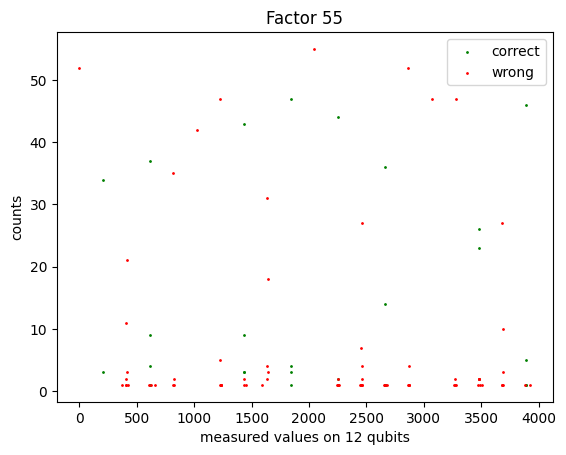

In [31]:
analyze_result(counts, 12, 7, 55, 5, 11)

In [32]:
from fractions import Fraction
Fraction(3891/2**12).limit_denominator(55)


Fraction(19, 20)

In [34]:
import math

print(math.gcd(7**10+1, 55))
print(math.gcd(7**10-1, 55))

5
11


## Factorize 221

In [34]:
n = 8
bigN = 221
y = 7
nx = 16
x = QuantumRegister(nx, 'x')
z = QuantumRegister(n, 'z')
a = QuantumRegister(n, 'a')
b = QuantumRegister(n+1, 'b')
c = QuantumRegister(n, 'c')
bN = QuantumRegister(n, 'bN')
t = QuantumRegister(1, 't')
cregx = ClassicalRegister(nx, 'cregx')
qc = QuantumCircuit(x, z, a, b, c, bN, t, cregx)
qc.h(x)
qc.x(z[0]) # z = 1 init
qc.x(bN[0]) # bN = 221 = 11011101(2)
qc.x(bN[2])
qc.x(bN[3])
qc.x(bN[4])
qc.x(bN[6])
qc.x(bN[7])

qc.append(create_mod_exp(n, bigN, y, nx), x[:] + z[:] + a[:] + b[:] + c[:] + bN[:] + list(t))
qc.append(create_qft(nx), x)
qc.measure(x, cregx)
display(qc.draw())
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend), shots=1024)
counts = job.result().get_counts()
print(counts)


┌───┐┌───────────┐┌───────────┐┌─┐                                 »
     x_0: ┤ H ├┤0          ├┤0          ├┤M├─────────────────────────────────»
          ├───┤│           ││           │└╥┘┌─┐                              »
     x_1: ┤ H ├┤1          ├┤1          ├─╫─┤M├──────────────────────────────»
          ├───┤│           ││           │ ║ └╥┘┌─┐                           »
     x_2: ┤ H ├┤2          ├┤2          ├─╫──╫─┤M├───────────────────────────»
          ├───┤│           ││           │ ║  ║ └╥┘┌─┐                        »
     x_3: ┤ H ├┤3          ├┤3          ├─╫──╫──╫─┤M├────────────────────────»
          ├───┤│           ││           │ ║  ║  ║ └╥┘┌─┐                     »
     x_4: ┤ H ├┤4          ├┤4          ├─╫──╫──╫──╫─┤M├─────────────────────»
          ├───┤│           ││           │ ║  ║  ║  ║ └╥┘┌─┐                  »
     x_5: ┤ H ├┤5          ├┤5          ├─╫──╫──╫──╫──╫─┤M├──────────────────»
          ├───┤│           ││           │ ║  ║  ║  ║  ║ └╥┘┌─┐               »
     x_6: ┤ H ├┤6          ├┤6          ├─╫──╫──╫──╫──╫──╫─┤M├───────────────»
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐            »
     x_7: ┤ H ├┤7          ├┤7          ├─╫──╫──╫──╫──╫──╫──╫─┤M├────────────»
          ├───┤│           ││   myqft16 │ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         »
     x_8: ┤ H ├┤8          ├┤8          ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────»
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      »
     x_9: ┤ H ├┤9          ├┤9          ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────»
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   »
    x_10: ┤ H ├┤10         ├┤10         ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───»
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐»
    x_11: ┤ H ├┤11         ├┤11         ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├»
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘»
    x_12: ┤ H ├┤12         ├┤12         ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    x_13: ┤ H ├┤13         ├┤13         ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    x_14: ┤ H ├┤14         ├┤14         ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    x_15: ┤ H ├┤15         ├┤15         ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           │└───────────┘ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_0: ┤ X ├┤16         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          └───┘│           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_1: ─────┤17         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_2: ─────┤18         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_3: ─────┤19         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_4: ─────┤20         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_5: ─────┤21         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_6: ─────┤22         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_7: ─────┤23         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     a_0: ─────┤24         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
               │           │              ║  ║  ║  ║  ║  ║  

{'1100010101010011': 1, '0110010101000010': 1, '0010101010101110': 1, '0101010101010110': 1, '1000010101010111': 1, '0101010101011000': 1, '1000010101010100': 1, '0100101010100101': 1, '1001101010101001': 1, '0011010101010100': 1, '0011101010101000': 1, '1010010101010100': 1, '0100010101010100': 1, '0101010101010011': 1, '0100010101001011': 1, '1111010101010100': 1, '1111101010100101': 1, '1001101010101010': 4, '1101010101011001': 1, '0010101010101010': 1, '1110101010101101': 1, '1111101010101010': 2, '0100010101010000': 1, '0111010101010110': 1, '1111101010110000': 1, '1100101010101101': 1, '0010101010111111': 1, '1100101010101110': 1, '0001010101011000': 1, '0110101010100100': 1, '0010010101010111': 1, '1001101010100010': 1, '0100101010101100': 1, '0010010101010100': 2, '1000010101010110': 2, '1011101010101010': 2, '0101010101010100': 1, '1101101010101100': 1, '1000101010101100': 2, '1110010100100000': 1, '1011101010101000': 2, '0110101010100101': 1, '0110010101010110': 3, '000001010

correct count 341, wrong count 683, total 1024, correct rate 0.3330078125


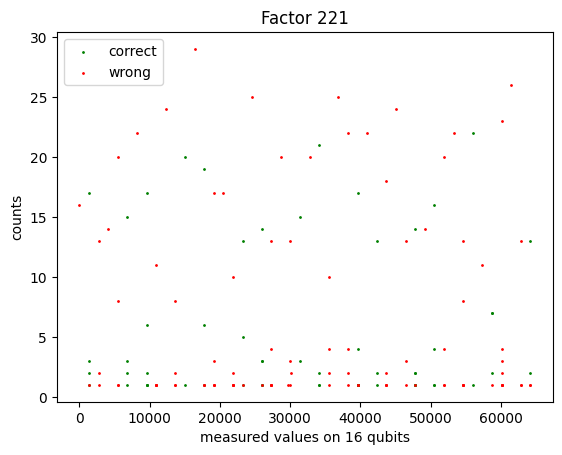

In [35]:
analyze_result(counts, 16, 7, 221, 13, 17)

In [36]:
from fractions import Fraction
Fraction(1365/2**16).limit_denominator(221)

Fraction(1, 48)

In [37]:
import math

print(math.gcd(3**24+1, 221))
print(math.gcd(3**24-1, 221))

17
13


In [38]:
17*13

221

## Factorize 437

This took 3 hours to run on i7-4790 and 4.5 hours to run on M1 Macbook.  Qiskit simulator is single-threaded.

In [39]:
n = 9
bigN = 437
y = 7
nx = 18
x = QuantumRegister(nx, 'x')
z = QuantumRegister(n, 'z')
a = QuantumRegister(n, 'a')
b = QuantumRegister(n+1, 'b')
c = QuantumRegister(n, 'c')
bN = QuantumRegister(n, 'bN')
t = QuantumRegister(1, 't')
cregx = ClassicalRegister(nx, 'cregx')
qc = QuantumCircuit(x, z, a, b, c, bN, t, cregx)
qc.h(x)
qc.x(z[0]) # z = 1 init
qc.x(bN[0]) # bN = 437 = 110110101(2)
qc.x(bN[2])
qc.x(bN[4])
qc.x(bN[5])
qc.x(bN[7])
qc.x(bN[8])

qc.append(create_mod_exp(n, bigN, y, nx), x[:] + z[:] + a[:] + b[:] + c[:] + bN[:] + list(t))
qc.append(create_qft(nx), x)
qc.measure(x, cregx)
display(qc.draw())
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend), shots=1024)
counts = job.result().get_counts()
print(counts)


┌───┐┌───────────┐┌───────────┐┌─┐                                 »
     x_0: ┤ H ├┤0          ├┤0          ├┤M├─────────────────────────────────»
          ├───┤│           ││           │└╥┘┌─┐                              »
     x_1: ┤ H ├┤1          ├┤1          ├─╫─┤M├──────────────────────────────»
          ├───┤│           ││           │ ║ └╥┘┌─┐                           »
     x_2: ┤ H ├┤2          ├┤2          ├─╫──╫─┤M├───────────────────────────»
          ├───┤│           ││           │ ║  ║ └╥┘┌─┐                        »
     x_3: ┤ H ├┤3          ├┤3          ├─╫──╫──╫─┤M├────────────────────────»
          ├───┤│           ││           │ ║  ║  ║ └╥┘┌─┐                     »
     x_4: ┤ H ├┤4          ├┤4          ├─╫──╫──╫──╫─┤M├─────────────────────»
          ├───┤│           ││           │ ║  ║  ║  ║ └╥┘┌─┐                  »
     x_5: ┤ H ├┤5          ├┤5          ├─╫──╫──╫──╫──╫─┤M├──────────────────»
          ├───┤│           ││           │ ║  ║  ║  ║  ║ └╥┘┌─┐               »
     x_6: ┤ H ├┤6          ├┤6          ├─╫──╫──╫──╫──╫──╫─┤M├───────────────»
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐            »
     x_7: ┤ H ├┤7          ├┤7          ├─╫──╫──╫──╫──╫──╫──╫─┤M├────────────»
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         »
     x_8: ┤ H ├┤8          ├┤8          ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────»
          ├───┤│           ││   myqft18 │ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      »
     x_9: ┤ H ├┤9          ├┤9          ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────»
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   »
    x_10: ┤ H ├┤10         ├┤10         ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───»
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐»
    x_11: ┤ H ├┤11         ├┤11         ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├»
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘»
    x_12: ┤ H ├┤12         ├┤12         ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    x_13: ┤ H ├┤13         ├┤13         ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    x_14: ┤ H ├┤14         ├┤14         ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    x_15: ┤ H ├┤15         ├┤15         ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    x_16: ┤ H ├┤16         ├┤16         ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           ││           │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    x_17: ┤ H ├┤17         ├┤17         ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           │└───────────┘ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_0: ┤ X ├┤18         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          └───┘│           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_1: ─────┤19         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_2: ─────┤20         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_3: ─────┤21         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_4: ─────┤22         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_5: ─────┤23         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
               │           │              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_6: ─────┤24         ├──────────────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
               │           │              ║  ║  ║  ║  ║  ║  

{'111011001001101110': 1, '011111000001111101': 1, '011101000101000100': 1, '001101100100111000': 1, '001010101010100111': 1, '001010101010100101': 1, '101001101100100101': 1, '100001111100000110': 1, '110101010101011110': 1, '010010011011001000': 1, '000000111110000011': 1, '010001011101000111': 1, '011110000011111000': 14, '111011001001101010': 1, '010000011111000010': 12, '000011111000001101': 1, '101101100101000000': 1, '000001111100000111': 2, '010010011011001001': 1, '101110100110101110': 1, '100101110101000101': 1, '111110000011110111': 1, '101010101010101000': 1, '111100000111110101': 1, '101000101110100011': 17, '001101100100110101': 2, '110010011011001100': 1, '001110100010111011': 1, '000101110100011000': 1, '101100100110111001': 1, '000000111110000110': 1, '101010101010101110': 1, '111100000111101111': 1, '010111010001011100': 1, '001011101000101110': 4, '101010101010101101': 1, '000001111100000110': 2, '001001101100100110': 2, '000100110101111011': 1, '110110010011011010':

correct count 294, wrong count 730, total 1024, correct rate 0.287109375


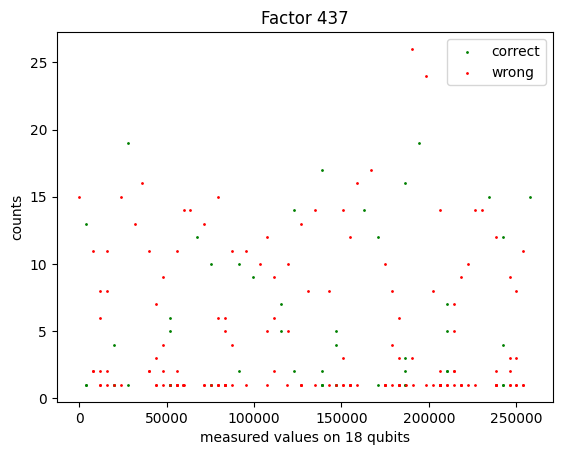

In [44]:
analyze_result(counts, 18, 7, 437, 19, 23)

In [45]:
from fractions import Fraction
Fraction(123128/2**18).limit_denominator(437)

Fraction(31, 66)

In [46]:
import math

print(math.gcd(7**33+1, 437))
print(math.gcd(7**33-1, 437))

23
19


In [47]:
23*19

437

In [48]:
qc_t = transpile(qc, backend)
print('circuit depth {}, operator count {}'.format(qc_t.depth(), qc_t.count_ops()))

/Users/thyung/opt/anaconda3/envs/qiskit_env/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/thyung/opt/anaconda3/envs/qiskit_env/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


circuit depth 84943, operator count OrderedDict([('cx', 58320), ('ccx', 57614), ('swap', 5841), ('x', 655), ('cswap', 162), ('cp', 153), ('h', 36), ('measure', 18)])


## Factor 851

To be executed.

In [22]:
n = 10
bigN = 851
y = 7
nx = 20
x = QuantumRegister(nx, 'x')
z = QuantumRegister(n, 'z')
a = QuantumRegister(n, 'a')
b = QuantumRegister(n+1, 'b')
c = QuantumRegister(n, 'c')
bN = QuantumRegister(n, 'bN')
t = QuantumRegister(1, 't')
cregx = ClassicalRegister(nx, 'cregx')
qc = QuantumCircuit(x, z, a, b, c, bN, t, cregx)
qc.h(x)
qc.x(z[0]) # z = 1 init
qc.x(bN[0]) # bN = 851 = 1101010011(2)
qc.x(bN[1])
qc.x(bN[4])
qc.x(bN[6])
qc.x(bN[8])
qc.x(bN[9])

qc.append(create_mod_exp(n, bigN, y, nx), x[:] + z[:] + a[:] + b[:] + c[:] + bN[:] + list(t))
qc.append(create_qft(nx), x)
qc.measure(x, cregx)
display(qc.draw())
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend), shots=1024)
counts = job.result().get_counts()
print(counts)


┌───┐┌───────────┐┌─────────────────────┐┌─┐                        »
     x_0: ┤ H ├┤0          ├┤0                    ├┤M├────────────────────────»
          ├───┤│           ││                     │└╥┘┌─┐                     »
     x_1: ┤ H ├┤1          ├┤1                    ├─╫─┤M├─────────────────────»
          ├───┤│           ││                     │ ║ └╥┘┌─┐                  »
     x_2: ┤ H ├┤2          ├┤2                    ├─╫──╫─┤M├──────────────────»
          ├───┤│           ││                     │ ║  ║ └╥┘┌─┐               »
     x_3: ┤ H ├┤3          ├┤3                    ├─╫──╫──╫─┤M├───────────────»
          ├───┤│           ││                     │ ║  ║  ║ └╥┘┌─┐            »
     x_4: ┤ H ├┤4          ├┤4                    ├─╫──╫──╫──╫─┤M├────────────»
          ├───┤│           ││                     │ ║  ║  ║  ║ └╥┘┌─┐         »
     x_5: ┤ H ├┤5          ├┤5                    ├─╫──╫──╫──╫──╫─┤M├─────────»
          ├───┤│           ││                     │ ║  ║  ║  ║  ║ └╥┘┌─┐      »
     x_6: ┤ H ├┤6          ├┤6                    ├─╫──╫──╫──╫──╫──╫─┤M├──────»
          ├───┤│           ││                     │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐   »
     x_7: ┤ H ├┤7          ├┤7                    ├─╫──╫──╫──╫──╫──╫──╫─┤M├───»
          ├───┤│           ││                     │ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐»
     x_8: ┤ H ├┤8          ├┤8                    ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├»
          ├───┤│           ││                     │ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘»
     x_9: ┤ H ├┤9          ├┤9                    ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           ││   circuit-388088_dg │ ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    x_10: ┤ H ├┤10         ├┤10                   ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           ││                     │ ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    x_11: ┤ H ├┤11         ├┤11                   ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           ││                     │ ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    x_12: ┤ H ├┤12         ├┤12                   ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           ││                     │ ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    x_13: ┤ H ├┤13         ├┤13                   ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           ││                     │ ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    x_14: ┤ H ├┤14         ├┤14                   ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           ││                     │ ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    x_15: ┤ H ├┤15         ├┤15                   ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           ││                     │ ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    x_16: ┤ H ├┤16         ├┤16                   ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           ││                     │ ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    x_17: ┤ H ├┤17         ├┤17                   ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           ││                     │ ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    x_18: ┤ H ├┤18         ├┤18                   ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           ││                     │ ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    x_19: ┤ H ├┤19         ├┤19                   ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          ├───┤│           │└─────────────────────┘ ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_0: ┤ X ├┤20         ├────────────────────────╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          └───┘│           │                        ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_1: ─────┤21         ├────────────────────────╫──╫──╫──╫──╫──╫──╫──╫──╫─»
               │           │                        ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_2: ─────┤22         ├────────────────────────╫──╫──╫──╫──╫──╫──╫──╫──╫─»
               │           │                        ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_3: ─────┤23         ├────────────────────────╫──╫──╫──╫──╫──╫──╫──╫──╫─»
               │           │                        ║  ║  ║  ║  ║  ║  ║  ║  ║ »
     z_4: ─────┤24         ├────────────────────────╫──╫──╫──╫──╫──╫──╫──╫──╫─»
          

In [ ]:
analyze_result(counts, 20, 7, 851, 23, 37)

In [ ]:
from fractions import Fraction
Fraction(0/2**20).limit_denominator(851)

## Circuit complexity 

### Calculate the depth and gate for factoring

In [27]:
def gen_qc(n, bigN, y, nx):
    x = QuantumRegister(nx, 'x')
    z = QuantumRegister(n, 'z')
    a = QuantumRegister(n, 'a')
    b = QuantumRegister(n+1, 'b')
    c = QuantumRegister(n, 'c')
    bN = QuantumRegister(n, 'bN')
    t = QuantumRegister(1, 't')
    cregx = ClassicalRegister(nx, 'cregx')
    qc = QuantumCircuit(x, z, a, b, c, bN, t, cregx)
    qc.h(x)
    qc.x(z[0]) # z = 1 init
    tmp_bigN = bigN
    i = 0
    while tmp_bigN != 0:
        if tmp_bigN % 2 == 1:
            qc.x(bN[i])
        tmp_bigN = tmp_bigN // 2
        i = i + 1

    qc.append(create_mod_exp(n, bigN, y, nx), x[:] + z[:] + a[:] + b[:] + c[:] + bN[:] + list(t))
    qc.append(create_qft(nx), x)
    qc.measure(x, cregx)
    backend = Aer.get_backend('qasm_simulator')
    qc_t = transpile(qc, backend)
    return qc_t

qc_15  = gen_qc(4, 15, 7, 8)
qc_55  = gen_qc(6, 55, 7, 12)
qc_221 = gen_qc(8, 221, 7, 16)
qc_437 = gen_qc(9, 437, 7, 18)
qc_851 = gen_qc(10, 851, 7, 20)



In [28]:
print(qc_15.depth(), qc_15.count_ops())
print(qc_851.depth(), qc_851.count_ops())

7095 OrderedDict([('cx', 4864), ('ccx', 4640), ('swap', 516), ('x', 133), ('cswap', 32), ('cp', 28), ('h', 16), ('measure', 8)])
117224 OrderedDict([('cx', 80000), ('ccx', 79844), ('swap', 8010), ('x', 807), ('cswap', 200), ('cp', 190), ('h', 40), ('measure', 20)])


### Fit degree 3 polynomial to gate count

In [29]:
n_array = [4, 6, 8, 9, 10]
qc_array = [qc_15, qc_55, qc_221, qc_437, qc_851]
depth_array = []
ops_array = []
for qc_i in qc_array:
    depth_array.append(qc_i.depth())  
    ops_array.append(sum(qc_i.count_ops().values()))
print(depth_array)
print(ops_array)

[7095, 24709, 59352, 84943, 117224]
[10237, 35764, 86201, 122799, 169111]


[ 168.97258772   40.45817669 -453.65820802  580.27631579]


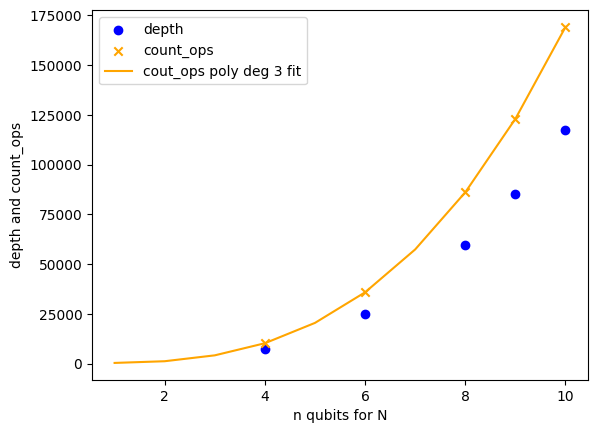

In [30]:
import matplotlib.pyplot as plt
import numpy

opsfit = numpy.polyfit(n_array, ops_array, 3)
print(opsfit)
opsmodel = numpy.poly1d(opsfit)
opsline = numpy.linspace(1, 10, 10)

plt.xlabel('n qubits for N')
plt.ylabel('depth and count_ops')
plt.scatter(n_array, depth_array, marker='o', c='blue')
plt.scatter(n_array, ops_array, marker='x', c='orange')
plt.plot(opsline, opsmodel(opsline), c='orange')
plt.legend(['depth', 'count_ops', 'cout_ops poly deg 3 fit'])
plt.show()

### Extrapolate the gate count

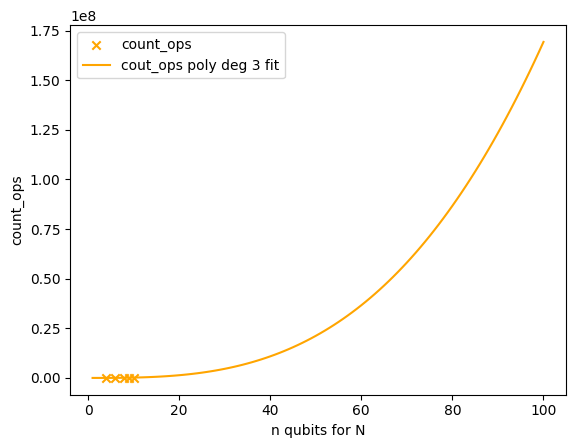

In [31]:
opsline2 = numpy.linspace(1, 100, 100)
plt.xlabel('n qubits for N')
plt.ylabel('count_ops')
plt.scatter(n_array, ops_array, marker='x', c='orange')
plt.plot(opsline2, opsmodel(opsline2), c='orange')
plt.legend(['count_ops', 'cout_ops poly deg 3 fit'])
plt.show()

### Check extrapolation with 13 and 16 qubits circuit

In [32]:
qc_7663 = gen_qc(13, 7663, 7, 26)


In [37]:
qc_35263 = gen_qc(16, 35263, 7, 32)


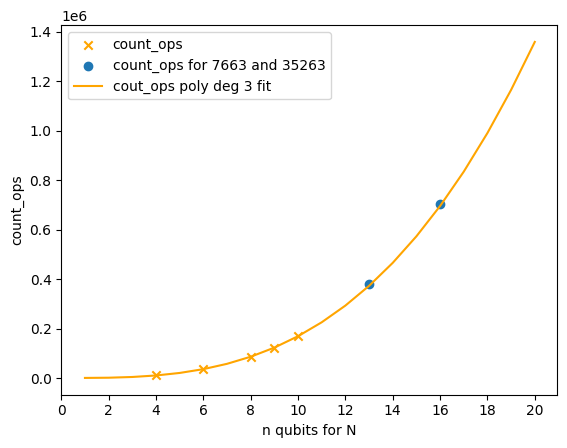

In [40]:
opsline3 = numpy.linspace(1, 20, 20)
plt.xlabel('n qubits for N')
plt.ylabel('count_ops')
plt.scatter(n_array, ops_array, marker='x', c='orange')
plt.scatter([13, 16], [sum(qc_7663.count_ops().values()), sum(qc_35263.count_ops().values())])
plt.plot(opsline3, opsmodel(opsline3), c='orange')
plt.legend(['count_ops', 'count_ops for 7663 and 35263', 'cout_ops poly deg 3 fit'])
plt.xticks(range(0, 22, 2))
plt.show()

In [41]:
import qiskit.tools.jupyter
%qiskit_version_table